In [23]:
## Setup and Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [24]:
## Load Data
csv_file = "Hospital_Inpatient_Discharges_(SPARCS_De-Identified)__2024_20251208.csv"

print(f"Loading data from {csv_file}...")
df = pd.read_csv(csv_file)

print(f"\nData loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading data from Hospital_Inpatient_Discharges_(SPARCS_De-Identified)__2024_20251208.csv...

Data loaded successfully!
Shape: (2196737, 33)
Memory usage: 3248.90 MB


In [25]:
## Data Overview
print("=" * 60)
print("DATA OVERVIEW")
print("=" * 60)

print("\nFirst few rows:")
df.head()

DATA OVERVIEW

First few rows:


,Health Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,Hudson Valley,Westchester,5957001.0,1139.0,WESTCHESTER MEDICAL CENTER,0-17,OOS,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2024,SYM002,FEVER,NaN,NaN,722,FEVER AND INFLAMMATORY CONDITIONS,18,"INFECTIOUS AND PARASITIC DISEASES, SYSTEMIC OR...",2,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,46814.00,6772.07
1,New York City,Queens,7003001.0,1628.0,FLUSHING HOSPITAL MEDICAL CENTER,0-17,113,M,White,Spanish/Hispanic,2,Emergency,Home or Self Care,2024,SYM002,FEVER,NaN,NaN,722,FEVER AND INFLAMMATORY CONDITIONS,18,"INFECTIOUS AND PARASITIC DISEASES, SYSTEMIC OR...",2,Moderate,Moderate,Medical,Medicaid,NaN,NaN,NaN,Y,13490.00,15464.30
2,New York City,New York,7002054.0,1458.0,NEW YORK-PRESBYTERIAN HOSPITAL - NEW YORK WEIL...,70 or Older,100,M,White,Not Span/Hispanic,2,Emergency,Home or Self Care,2024,SYM002,FEVER,ADM012,CHEMOTHERAPY,722,FEVER AND INFLAMMATORY CONDITIONS,18,"INFECTIOUS AND PARASITIC DISEASES, SYSTEMIC OR...",2,Moderate,Moderate,Medical,Medicare,Private Health Insurance,NaN,NaN,Y,49503.16,9324.77
3,New York City,New York,7002054.0,1464.0,NEW YORK-PRESBYTERIAN HOSPITAL - COLUMBIA PRES...,0-17,100,F,Other Race,Not Span/Hispanic,1,Emergency,Home or Self Care,2024,SYM002,FEVER,CNS002,LUMBAR PUNCTURE,722,FEVER AND INFLAMMATORY CONDITIONS,18,"INFECTIOUS AND PARASITIC DISEASES, SYSTEMIC OR...",1,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,2700,Y,27827.66,7304.27
4,New York City,New York,7002032.0,1466.0,MOUNT SINAI WEST,18-29,100,F,Other Race,Spanish/Hispanic,1,Emergency,Home or Self Care,2024,SYM002,FEVER,ADM021,"ADMINISTRATION OF THERAPEUTIC SUBSTANCES, NEC",722,FEVER AND INFLAMMATORY CONDITIONS,18,"INFECTIOUS AND PARASITIC DISEASES, SYSTEMIC OR...",2,Moderate,Minor,Medical,Medicare,NaN,NaN,NaN,Y,32798.29,7948.10


In [26]:
## Data Preprocessing
# Convert Total Costs to numeric
df['Total Costs'] = pd.to_numeric(df['Total Costs'], errors='coerce')

# Handle Length of Stay
df['Length of Stay'] = df['Length of Stay'].replace('120+', 120).astype(float)

# Create Payment_Typology from Payment Typology columns
if 'Payment Typology 1' in df.columns:
    def select_payment(row):
        if pd.notna(row.get('Payment Typology 1')):
            return row['Payment Typology 1']
        elif pd.notna(row.get('Payment Typology 2')):
            return row['Payment Typology 2']
        elif pd.notna(row.get('Payment Typology 3')):
            return row['Payment Typology 3']
        else:
            return "Unknown"
    
    df['Payment_Typology'] = df.apply(select_payment, axis=1)

# Remove rows with missing Total Costs (target variable)
df = df.dropna(subset=['Total Costs'])

print(f"Data shape after preprocessing: {df.shape}")
print(f"Total Costs range: ${df['Total Costs'].min():,.2f} - ${df['Total Costs'].max():,.2f}")

Data shape after preprocessing: (2196737, 34)
Total Costs range: $0.00 - $6,701,232.23


# EDA: Target Variable and Feature Analysis

This notebook focuses on:
1. Correlation Analysis
2. Target Variable (Total Costs) Distribution
3. Demographics Distribution
4. Effect of Variables on Total Costs

CORRELATION ANALYSIS


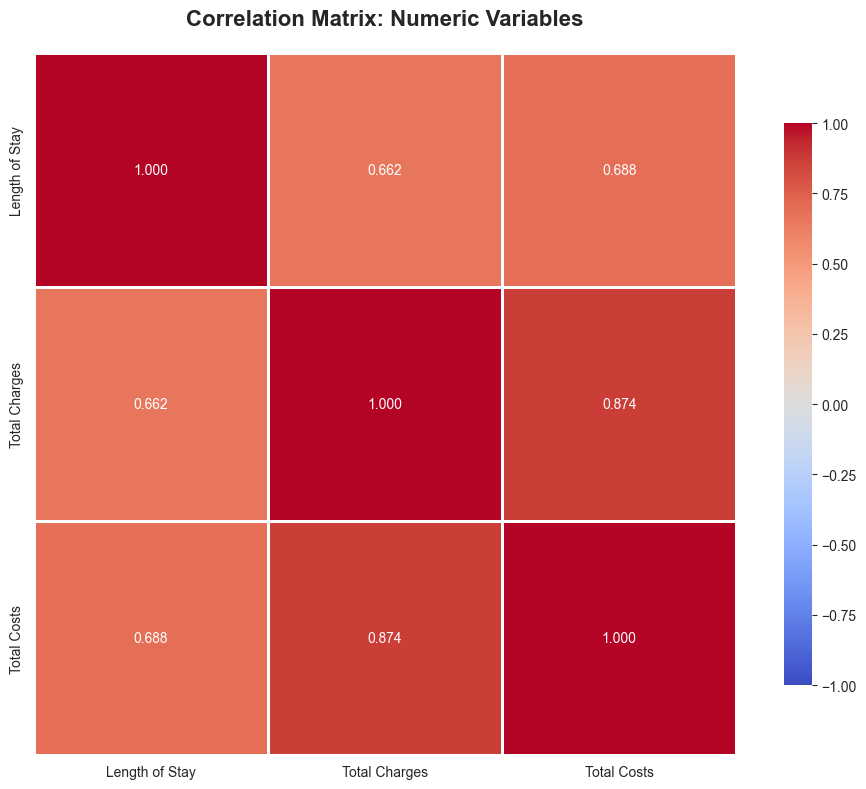


Correlation with Total Costs:
Total Costs       1.000000
Total Charges     0.873947
Length of Stay    0.688224
Name: Total Costs, dtype: float64


In [27]:
## 1. Correlation Analysis
print("=" * 70)
print("CORRELATION ANALYSIS")
print("=" * 70)

# Select numeric columns for correlation
numeric_cols = ['Length of Stay', 'Total Charges', 'Total Costs']
available_numeric = [col for col in numeric_cols if col in df.columns]

if len(available_numeric) > 1:
    # Calculate correlation
    corr_matrix = df[available_numeric].corr()
    
    # Visualize correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=2, cbar_kws={"shrink": 0.8}, 
                fmt='.3f', vmin=-1, vmax=1)
    plt.title('Correlation Matrix: Numeric Variables', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    print("\nCorrelation with Total Costs:")
    if 'Total Costs' in corr_matrix.columns:
        print(corr_matrix['Total Costs'].sort_values(ascending=False))

TARGET VARIABLE: TOTAL COSTS DISTRIBUTION


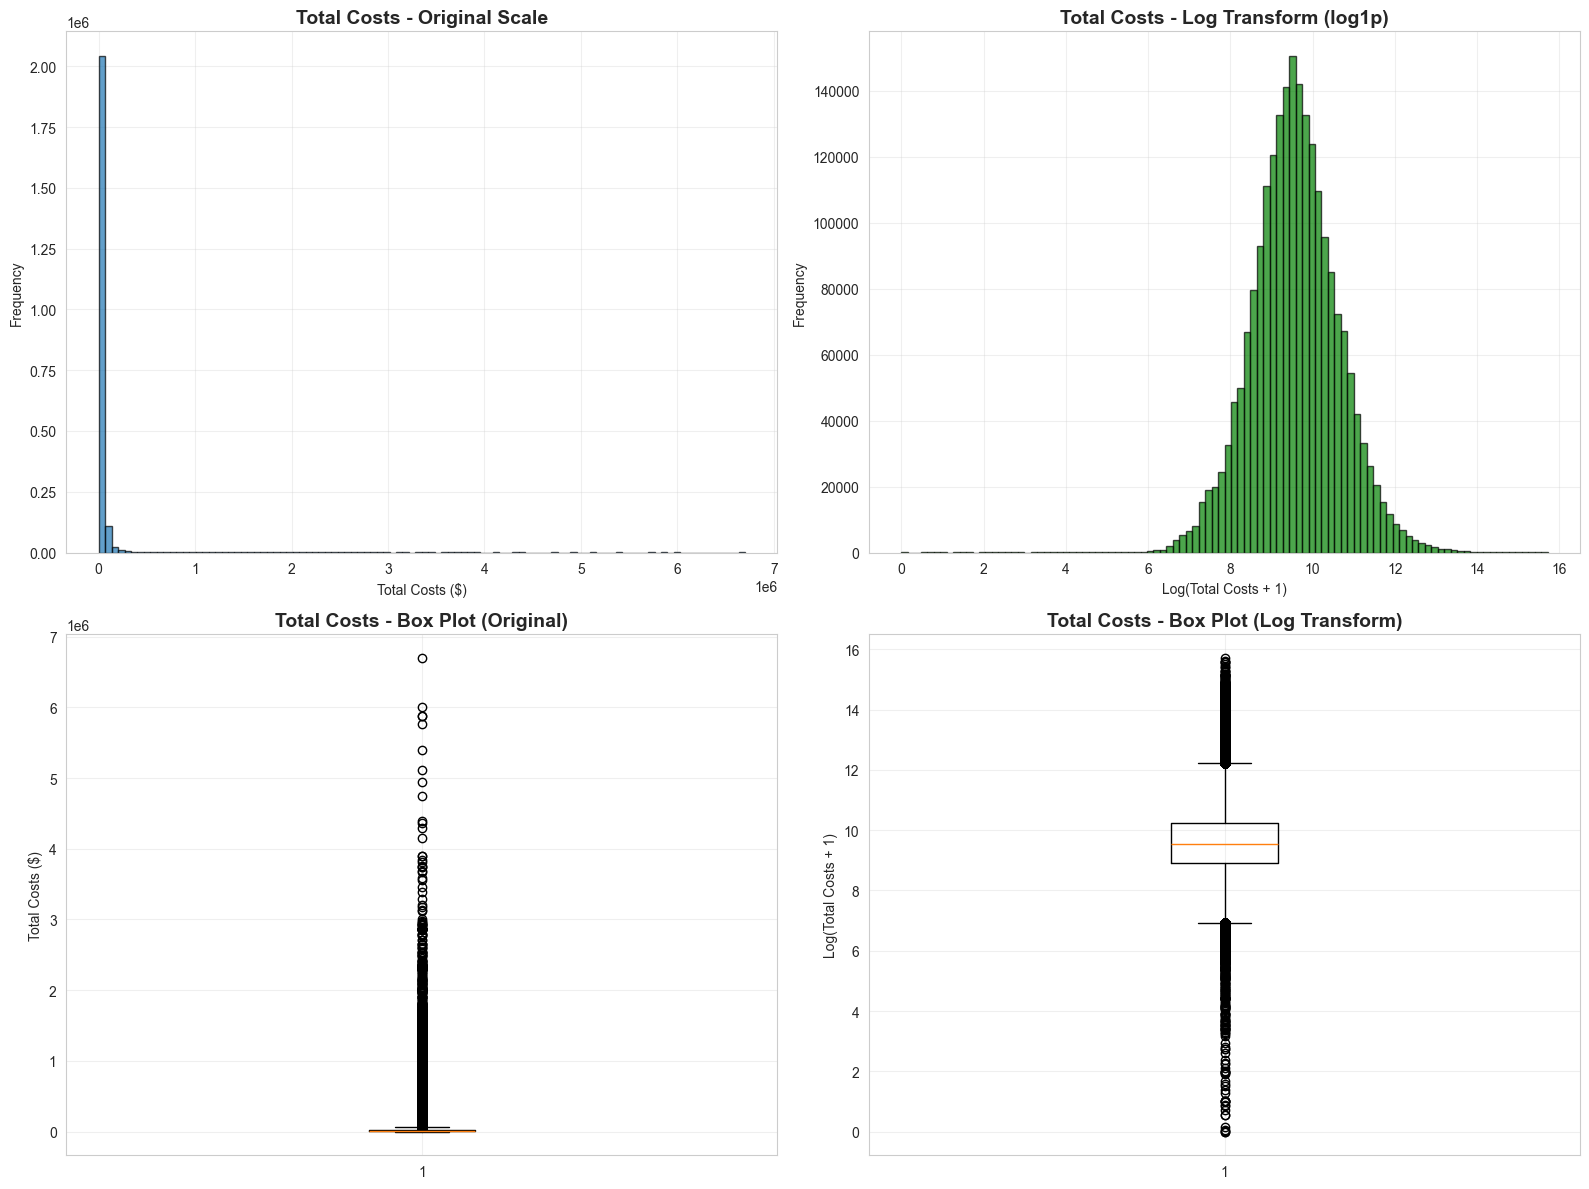


Summary Statistics - Original Scale:
count    2.196737e+06
mean     2.641658e+04
std      5.537229e+04
min      0.000000e+00
25%      7.415880e+03
50%      1.411045e+04
75%      2.778834e+04
max      6.701232e+06
Name: Total Costs, dtype: float64

Summary Statistics - Log Transform:
count    2.196737e+06
mean     9.579804e+00
std      1.044541e+00
min      0.000000e+00
25%      8.911514e+00
50%      9.554742e+00
75%      1.023241e+01
max      1.571780e+01
Name: Total Costs Log, dtype: float64


In [28]:
## 2. Target Variable (Total Costs) Distribution - Log Transform
print("=" * 70)
print("TARGET VARIABLE: TOTAL COSTS DISTRIBUTION")
print("=" * 70)

# Create log transform
df['Total Costs Log'] = np.log1p(df['Total Costs'])

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original distribution
axes[0, 0].hist(df['Total Costs'], bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Total Costs - Original Scale', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Total Costs ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Log transformed distribution
axes[0, 1].hist(df['Total Costs Log'], bins=100, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('Total Costs - Log Transform (log1p)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Log(Total Costs + 1)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Box plot - original
axes[1, 0].boxplot(df['Total Costs'], vert=True)
axes[1, 0].set_title('Total Costs - Box Plot (Original)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Total Costs ($)')
axes[1, 0].grid(True, alpha=0.3)

# Box plot - log transform
axes[1, 1].boxplot(df['Total Costs Log'], vert=True)
axes[1, 1].set_title('Total Costs - Box Plot (Log Transform)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Log(Total Costs + 1)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("\nSummary Statistics - Original Scale:")
print(df['Total Costs'].describe())
print("\nSummary Statistics - Log Transform:")
print(df['Total Costs Log'].describe())

DEMOGRAPHICS DISTRIBUTION


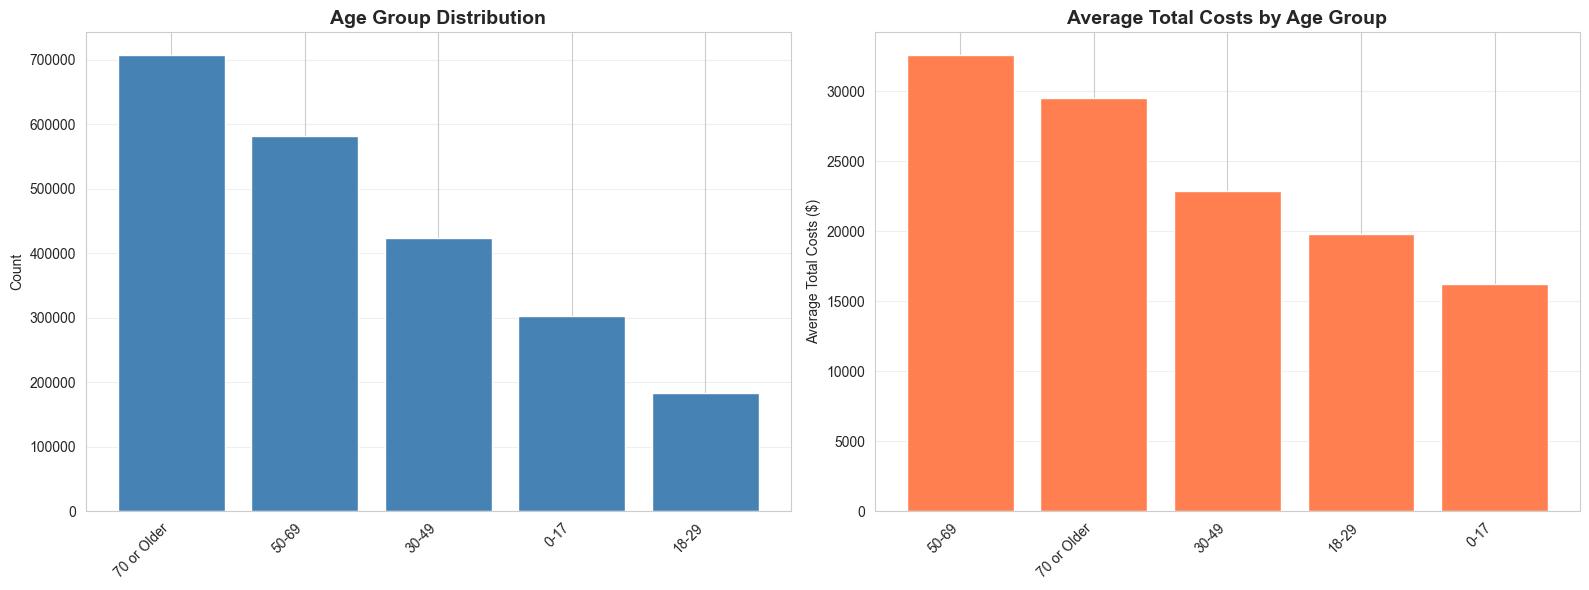


Age Group Distribution:
Age Group
70 or Older    706970
50-69          581333
30-49          423270
0-17           301927
18-29          183237
Name: count, dtype: int64

Average Total Costs by Age Group:
Age Group
50-69          32571.138310
70 or Older    29519.667048
30-49          22902.985251
18-29          19829.016806
0-17           16224.236133
Name: Total Costs, dtype: float64


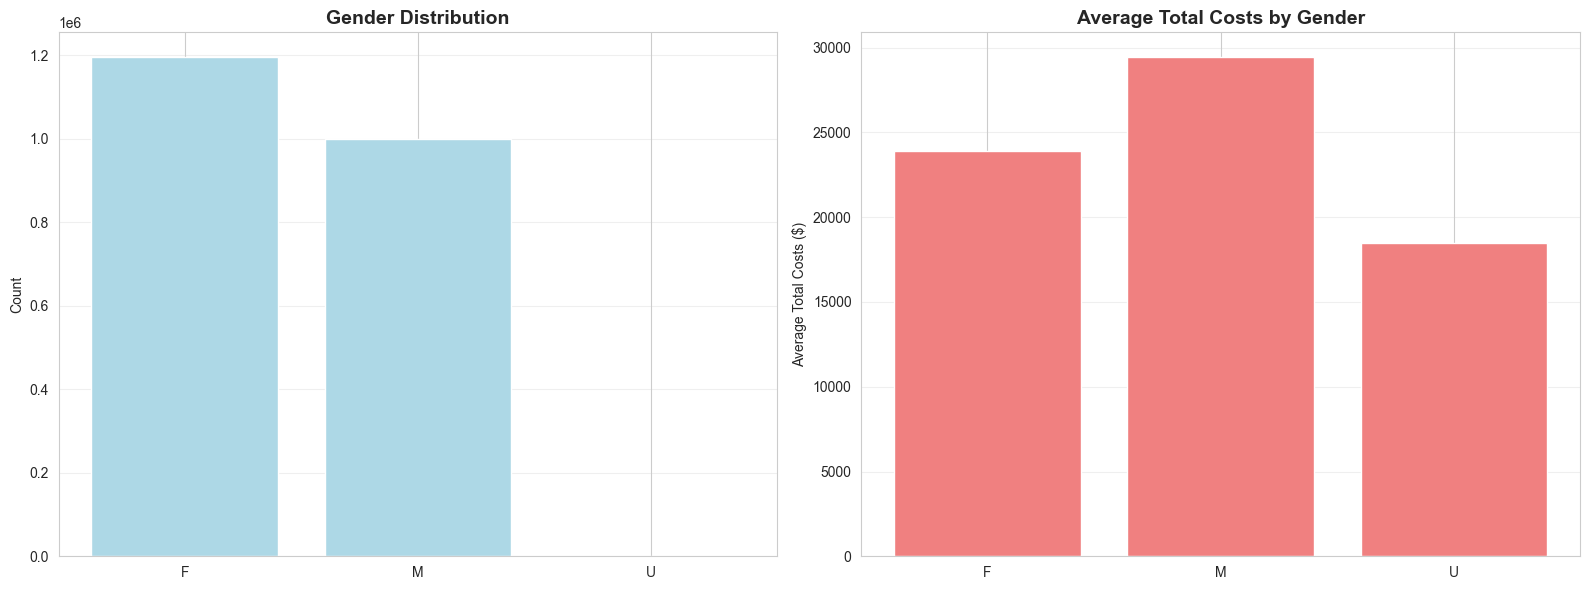


Gender Distribution:
Gender
F    1195617
M    1000735
U        385
Name: count, dtype: int64

Average Total Costs by Gender:
Gender
F    23895.409663
M    29431.772408
U    18506.096130
Name: Total Costs, dtype: float64


In [29]:
## 3. Demographics Distribution
print("=" * 70)
print("DEMOGRAPHICS DISTRIBUTION")
print("=" * 70)

# Age Group
if 'Age Group' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    age_counts = df['Age Group'].value_counts()
    axes[0].bar(range(len(age_counts)), age_counts.values, color='steelblue')
    axes[0].set_xticks(range(len(age_counts)))
    axes[0].set_xticklabels(age_counts.index, rotation=45, ha='right')
    axes[0].set_title('Age Group Distribution', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Count')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Age Group with Total Costs
    age_costs = df.groupby('Age Group')['Total Costs'].mean().sort_values(ascending=False)
    axes[1].bar(range(len(age_costs)), age_costs.values, color='coral')
    axes[1].set_xticks(range(len(age_costs)))
    axes[1].set_xticklabels(age_costs.index, rotation=45, ha='right')
    axes[1].set_title('Average Total Costs by Age Group', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Average Total Costs ($)')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print("\nAge Group Distribution:")
    print(age_counts)
    print("\nAverage Total Costs by Age Group:")
    print(age_costs)

# Gender
if 'Gender' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    gender_counts = df['Gender'].value_counts()
    axes[0].bar(gender_counts.index, gender_counts.values, color='lightblue')
    axes[0].set_title('Gender Distribution', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Count')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Gender with Total Costs
    gender_costs = df.groupby('Gender')['Total Costs'].mean()
    axes[1].bar(gender_costs.index, gender_costs.values, color='lightcoral')
    axes[1].set_title('Average Total Costs by Gender', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Average Total Costs ($)')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print("\nGender Distribution:")
    print(gender_counts)
    print("\nAverage Total Costs by Gender:")
    print(gender_costs)

## 4. Effect of Variables on Total Costs

Analyzing how different variables affect the target variable (Total Costs).

EFFECT OF AGE/GENDER ON TOTAL COSTS


<Figure size 1400x600 with 0 Axes>

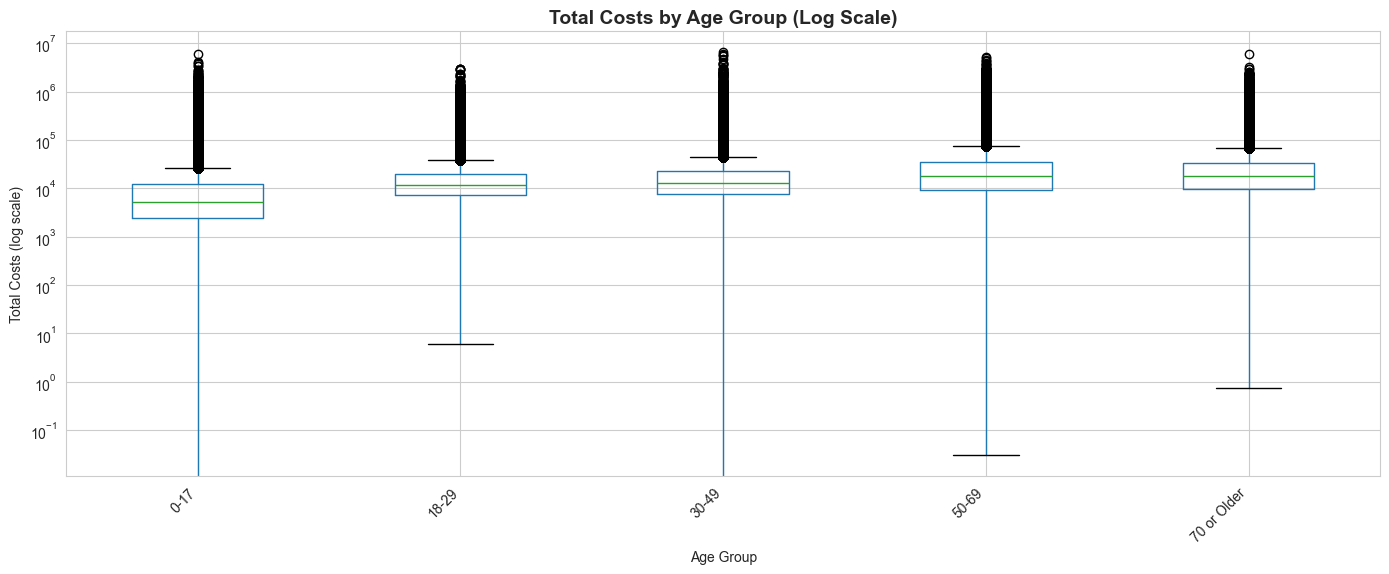

<Figure size 1000x600 with 0 Axes>

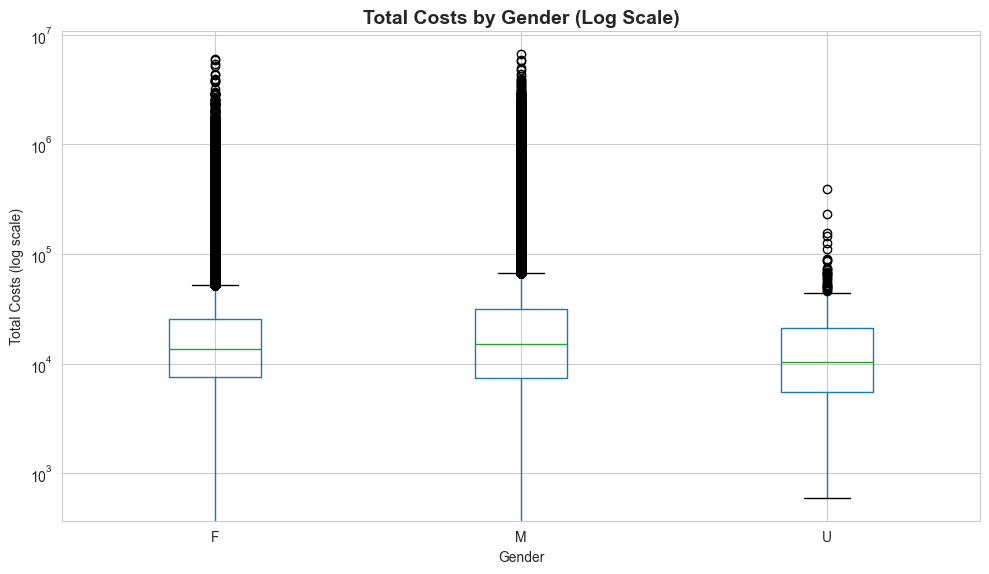

<Figure size 1400x600 with 0 Axes>

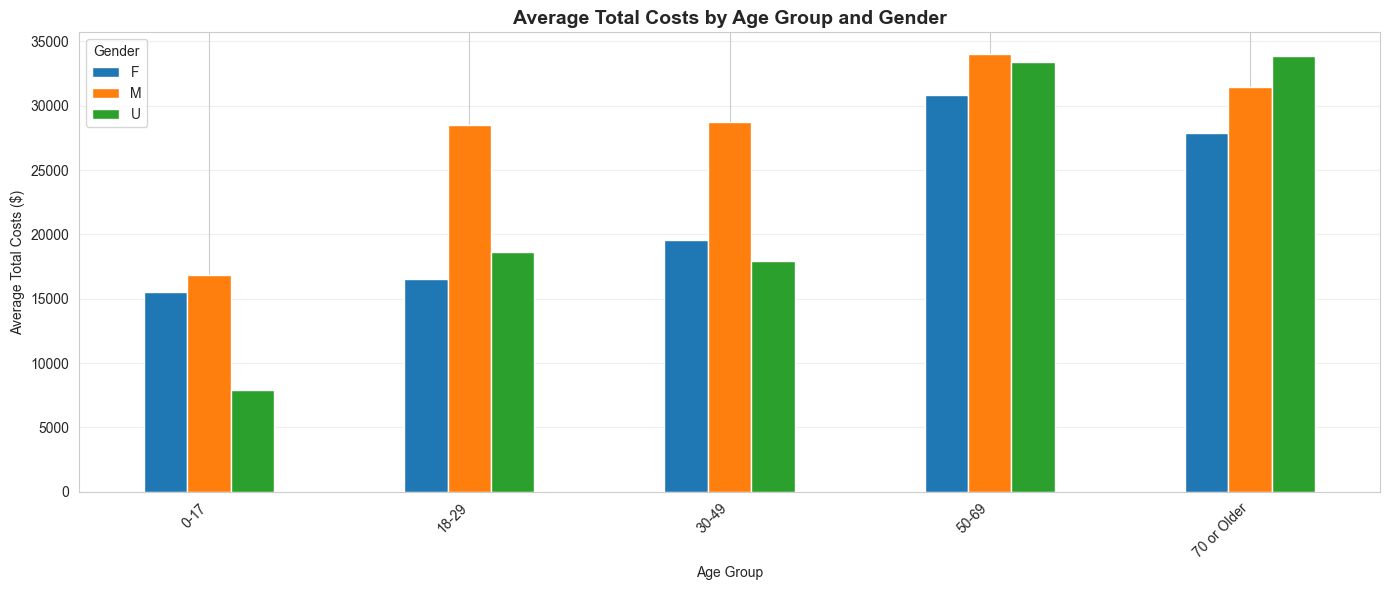

In [30]:
## 4.1 Age/Gender Effect on Total Costs
print("=" * 70)
print("EFFECT OF AGE/GENDER ON TOTAL COSTS")
print("=" * 70)

if 'Age Group' in df.columns and 'Gender' in df.columns:
    # Age Group vs Total Costs
    plt.figure(figsize=(14, 6))
    df.boxplot(column='Total Costs', by='Age Group', figsize=(14, 6))
    plt.yscale('log')
    plt.title('Total Costs by Age Group (Log Scale)', fontsize=14, fontweight='bold')
    plt.suptitle('')
    plt.xlabel('Age Group')
    plt.ylabel('Total Costs (log scale)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Gender vs Total Costs
    plt.figure(figsize=(10, 6))
    df.boxplot(column='Total Costs', by='Gender', figsize=(10, 6))
    plt.yscale('log')
    plt.title('Total Costs by Gender (Log Scale)', fontsize=14, fontweight='bold')
    plt.suptitle('')
    plt.xlabel('Gender')
    plt.ylabel('Total Costs (log scale)')
    plt.tight_layout()
    plt.show()
    
    # Combined: Age Group and Gender
    if df.groupby(['Age Group', 'Gender']).size().sum() > 0:
        age_gender_costs = df.groupby(['Age Group', 'Gender'])['Total Costs'].mean().unstack()
        plt.figure(figsize=(14, 6))
        age_gender_costs.plot(kind='bar', figsize=(14, 6))
        plt.title('Average Total Costs by Age Group and Gender', fontsize=14, fontweight='bold')
        plt.xlabel('Age Group')
        plt.ylabel('Average Total Costs ($)')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Gender')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()

EFFECT OF LENGTH OF STAY ON TOTAL COSTS


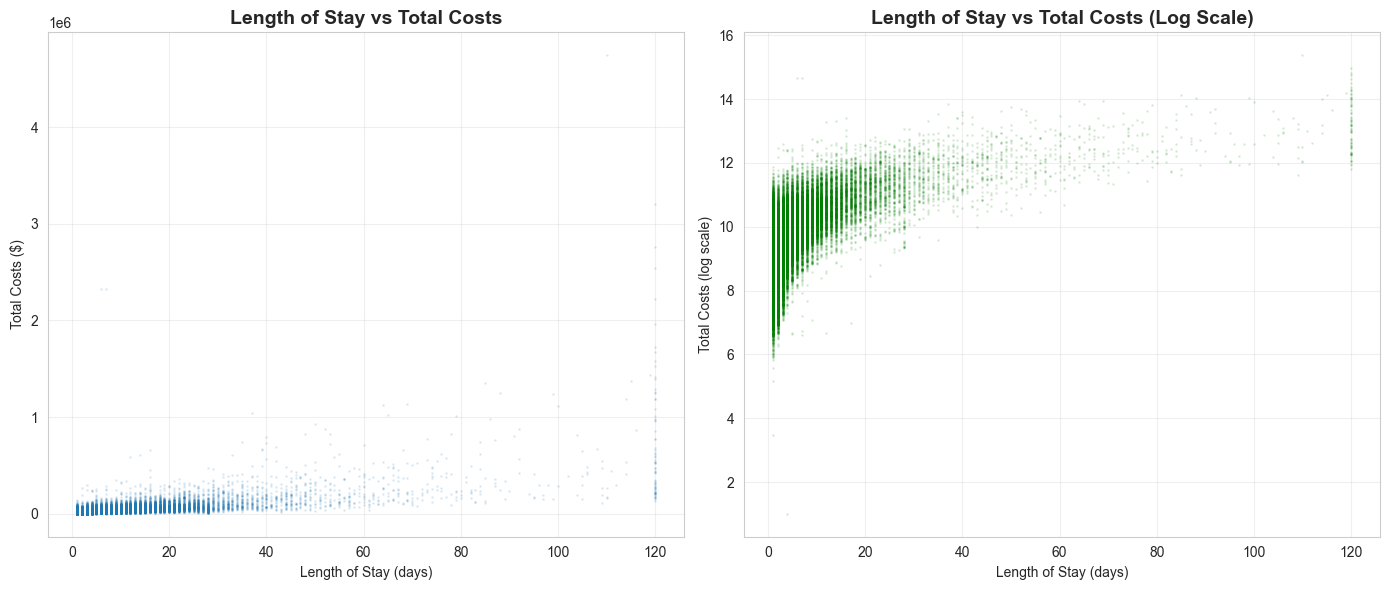


Correlation between Length of Stay and Total Costs: 0.6882


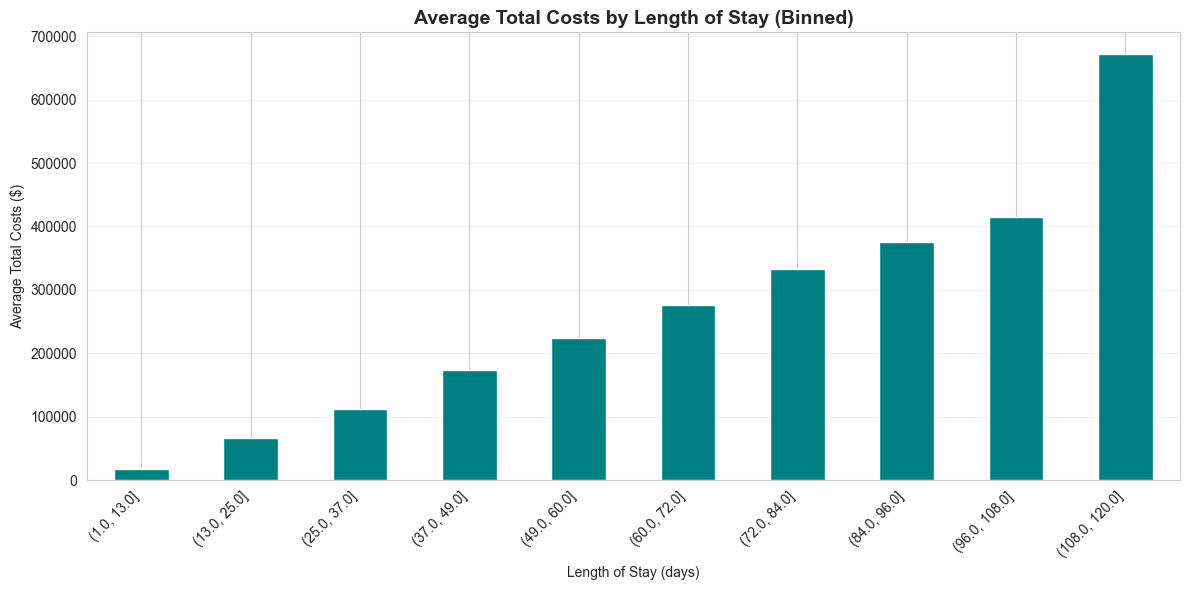

In [31]:
## 4.2 Length of Stay Effect on Total Costs
print("=" * 70)
print("EFFECT OF LENGTH OF STAY ON TOTAL COSTS")
print("=" * 70)

if 'Length of Stay' in df.columns:
    # Scatter plot
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sample_df = df.sample(min(50000, len(df)))  # Sample for performance
    plt.scatter(sample_df['Length of Stay'], sample_df['Total Costs'], 
                alpha=0.1, s=1)
    plt.xlabel('Length of Stay (days)')
    plt.ylabel('Total Costs ($)')
    plt.title('Length of Stay vs Total Costs', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Log scale scatter
    plt.subplot(1, 2, 2)
    plt.scatter(sample_df['Length of Stay'], sample_df['Total Costs Log'], 
                alpha=0.1, s=1, color='green')
    plt.xlabel('Length of Stay (days)')
    plt.ylabel('Total Costs (log scale)')
    plt.title('Length of Stay vs Total Costs (Log Scale)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Correlation
    los_corr = df[['Length of Stay', 'Total Costs']].corr().iloc[0, 1]
    print(f"\nCorrelation between Length of Stay and Total Costs: {los_corr:.4f}")
    
    # Binned analysis
    df['LOS_Binned'] = pd.cut(df['Length of Stay'], bins=10, precision=0)
    los_binned_costs = df.groupby('LOS_Binned')['Total Costs'].mean()
    plt.figure(figsize=(12, 6))
    los_binned_costs.plot(kind='bar', color='teal')
    plt.title('Average Total Costs by Length of Stay (Binned)', fontsize=14, fontweight='bold')
    plt.xlabel('Length of Stay (days)')
    plt.ylabel('Average Total Costs ($)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

EFFECT OF TYPE OF ADMISSION ON TOTAL COSTS


<Figure size 1400x600 with 0 Axes>

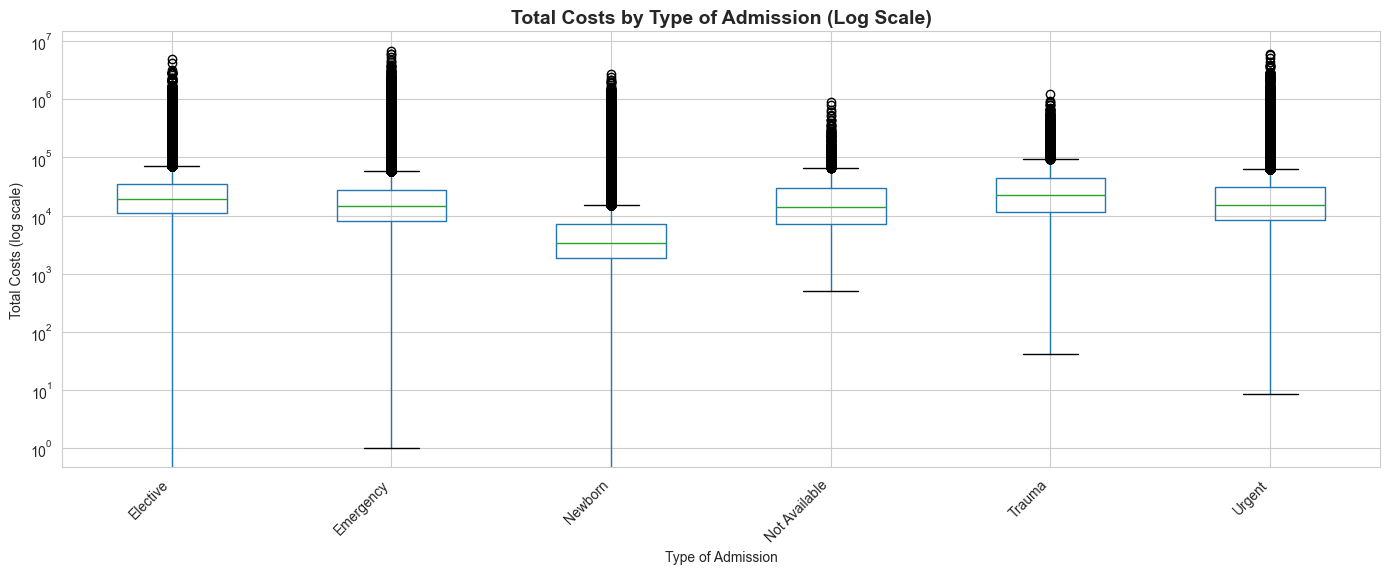


Total Costs Statistics by Type of Admission:
                           mean     median    count
Type of Admission                                  
Trauma             40131.487039  22880.600    10050
Urgent             32458.736193  15066.620   168716
Elective           30782.997290  19060.810   355896
Not Available      27253.174395  14158.305     3652
Emergency          26634.711998  14606.770  1460204
Newborn            11116.345295   3345.700   198219


In [32]:
## 4.3 Type of Admission Effect on Total Costs
print("=" * 70)
print("EFFECT OF TYPE OF ADMISSION ON TOTAL COSTS")
print("=" * 70)

if 'Type of Admission' in df.columns:
    plt.figure(figsize=(14, 6))
    df.boxplot(column='Total Costs', by='Type of Admission', figsize=(14, 6))
    plt.yscale('log')
    plt.title('Total Costs by Type of Admission (Log Scale)', fontsize=14, fontweight='bold')
    plt.suptitle('')
    plt.xlabel('Type of Admission')
    plt.ylabel('Total Costs (log scale)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    admission_costs = df.groupby('Type of Admission')['Total Costs'].agg(['mean', 'median', 'count'])
    print("\nTotal Costs Statistics by Type of Admission:")
    print(admission_costs.sort_values('mean', ascending=False))


EFFECT OF CCSR DIAGNOSIS DESCRIPTION ON TOTAL COSTS


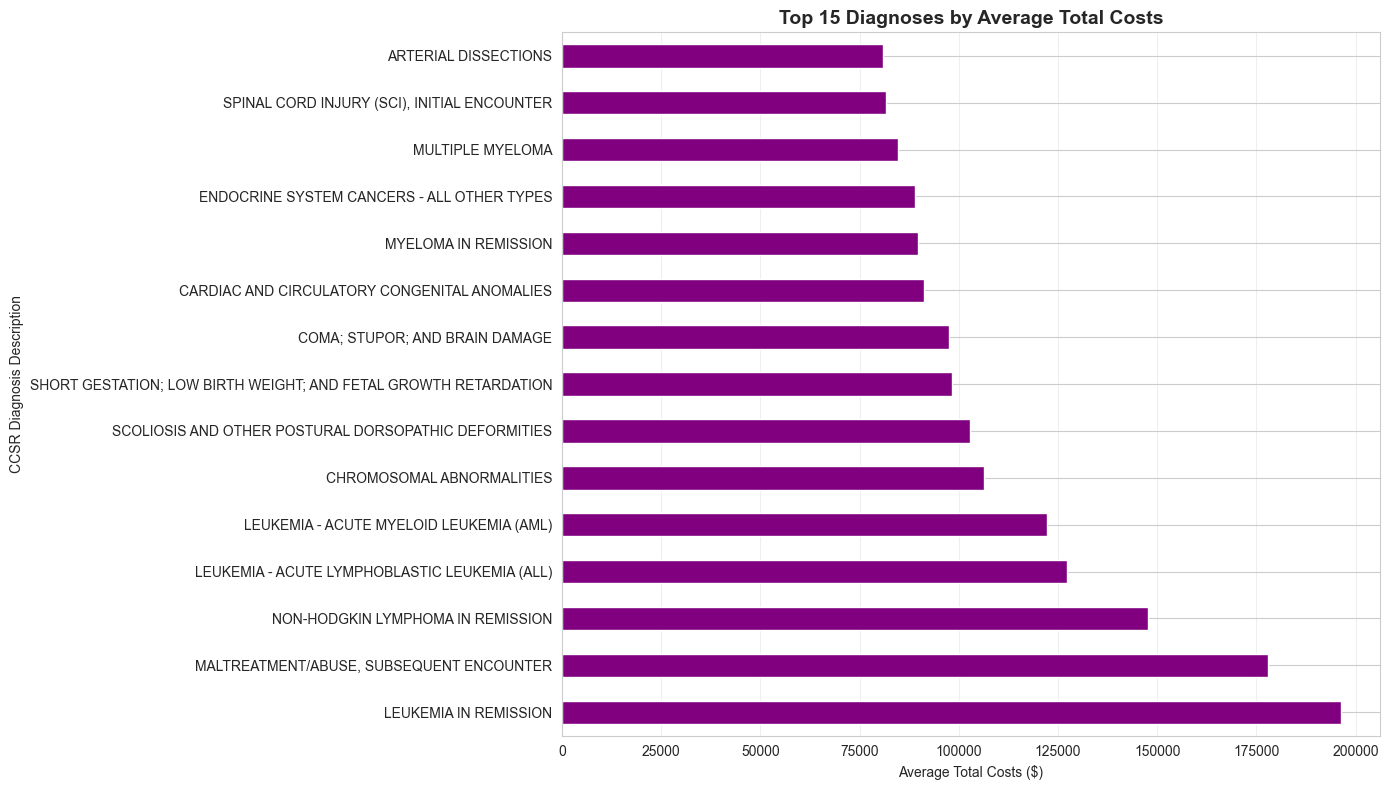


Top 15 Diagnoses by Average Total Costs:
                                                             mean  count
CCSR Diagnosis Description                                              
LEUKEMIA IN REMISSION                               196325.748942    208
MALTREATMENT/ABUSE, SUBSEQUENT ENCOUNTER            178001.964000      5
NON-HODGKIN LYMPHOMA IN REMISSION                   147770.234000      5
LEUKEMIA - ACUTE LYMPHOBLASTIC LEUKEMIA (ALL)       127328.687747    586
LEUKEMIA - ACUTE MYELOID LEUKEMIA (AML)             122191.378807   1551
CHROMOSOMAL ABNORMALITIES                           106371.158000     45
SCOLIOSIS AND OTHER POSTURAL DORSOPATHIC DEFORM...  102950.742452   1301
SHORT GESTATION; LOW BIRTH WEIGHT; AND FETAL GR...   98185.332870    216
COMA; STUPOR; AND BRAIN DAMAGE                       97568.255065    231
CARDIAC AND CIRCULATORY CONGENITAL ANOMALIES         91260.843865   3167
MYELOMA IN REMISSION                                 89738.424889     45
ENDOCRINE

<Figure size 1600x800 with 0 Axes>

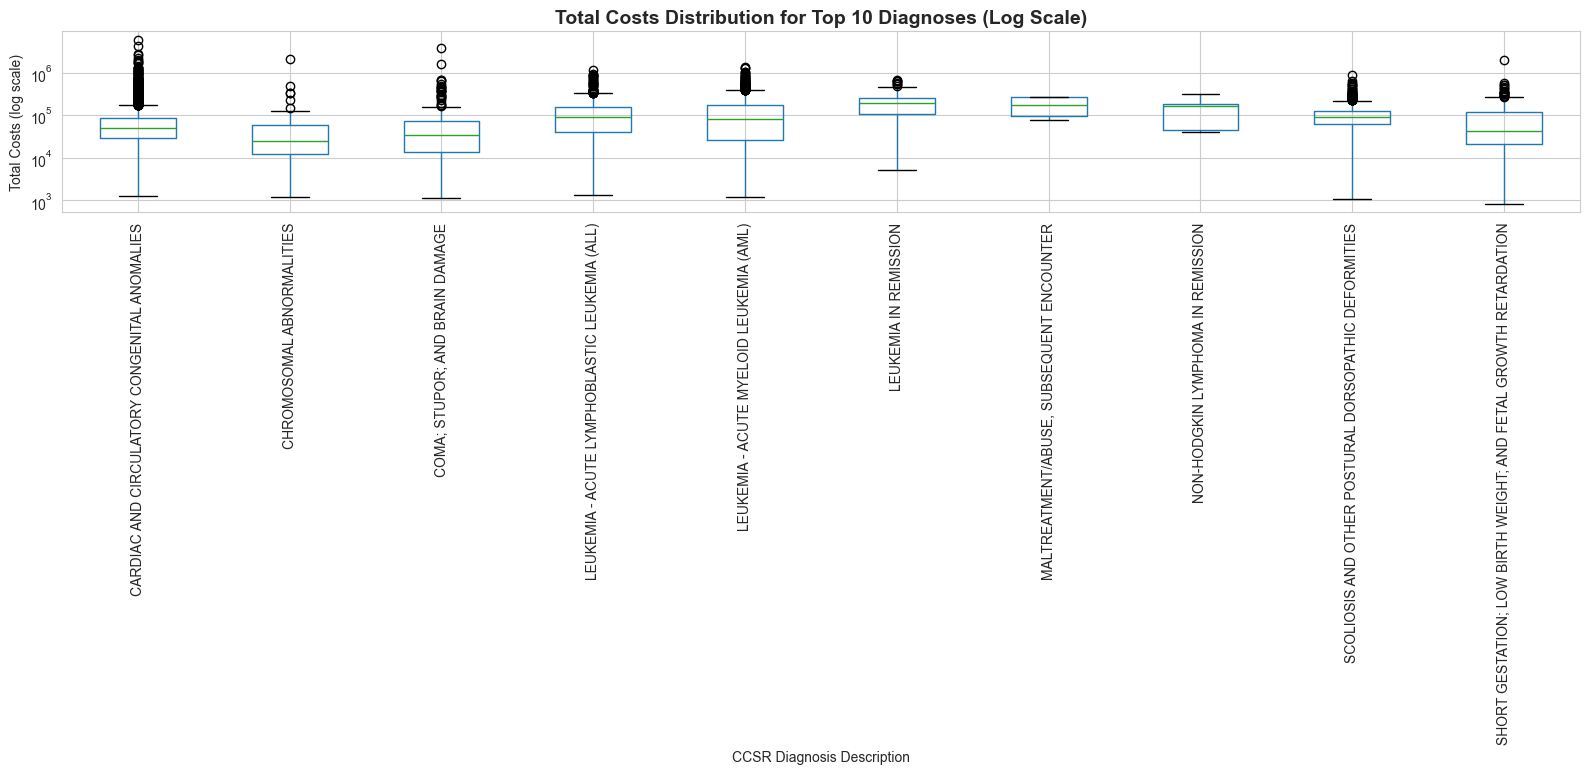

In [33]:
## 4.4 CCSR Diagnosis Description Effect on Total Costs
print("=" * 70)
print("EFFECT OF CCSR DIAGNOSIS DESCRIPTION ON TOTAL COSTS")
print("=" * 70)

if 'CCSR Diagnosis Description' in df.columns:
    # Top 15 diagnoses by average cost
    diagnosis_costs = df.groupby('CCSR Diagnosis Description')['Total Costs'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    top_15_diagnosis = diagnosis_costs.head(15)
    
    plt.figure(figsize=(14, 8))
    top_15_diagnosis['mean'].plot(kind='barh', color='purple')
    plt.title('Top 15 Diagnoses by Average Total Costs', fontsize=14, fontweight='bold')
    plt.xlabel('Average Total Costs ($)')
    plt.ylabel('CCSR Diagnosis Description')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 15 Diagnoses by Average Total Costs:")
    print(top_15_diagnosis)
    
    # Box plot for top 10
    top_10_diagnoses = top_15_diagnosis.head(10).index
    df_top_diagnoses = df[df['CCSR Diagnosis Description'].isin(top_10_diagnoses)]
    plt.figure(figsize=(16, 8))
    df_top_diagnoses.boxplot(column='Total Costs', by='CCSR Diagnosis Description', 
                             figsize=(16, 8), rot=90)
    plt.yscale('log')
    plt.title('Total Costs Distribution for Top 10 Diagnoses (Log Scale)', 
              fontsize=14, fontweight='bold')
    plt.suptitle('')
    plt.xlabel('CCSR Diagnosis Description')
    plt.ylabel('Total Costs (log scale)')
    plt.tight_layout()
    plt.show()


EFFECT OF CCSR PROCEDURE DESCRIPTION ON TOTAL COSTS


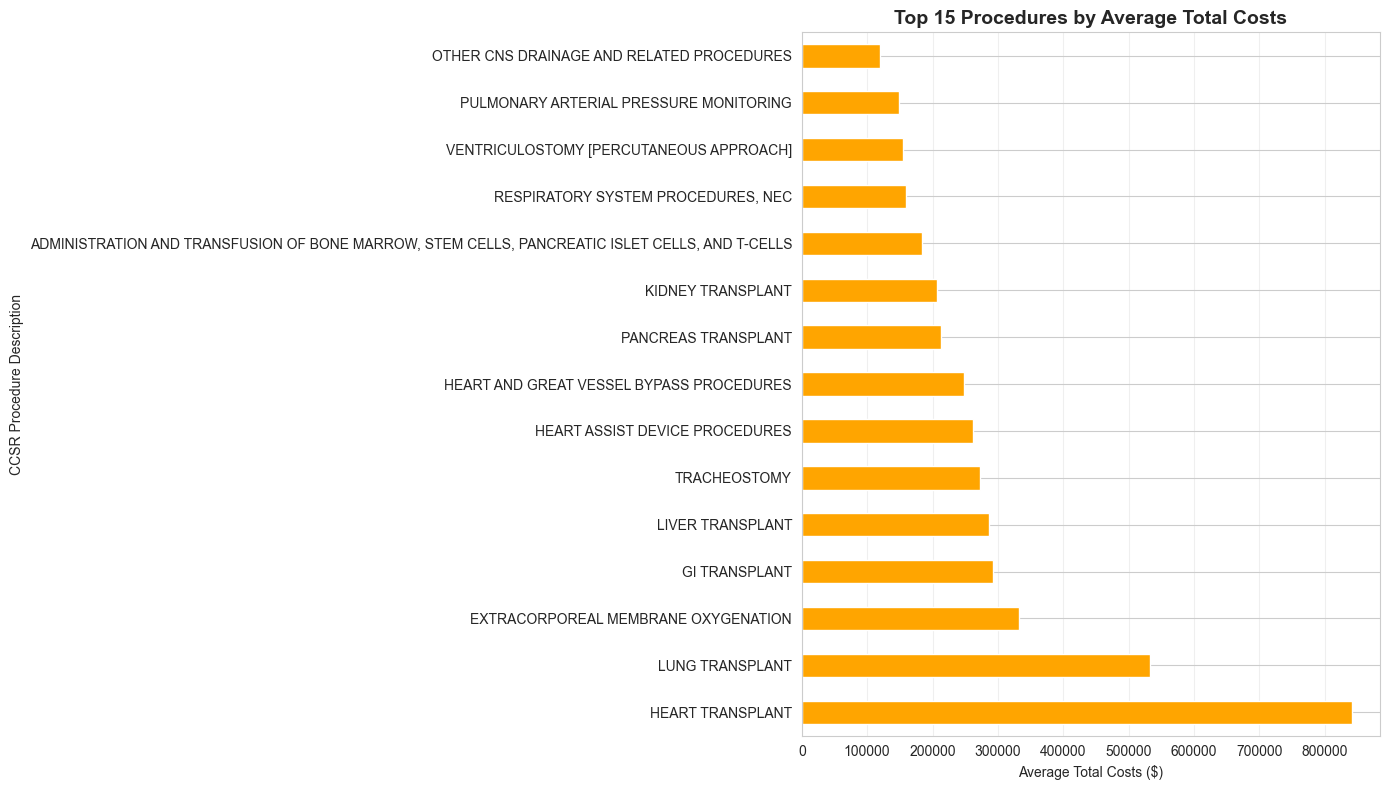


Top 15 Procedures by Average Total Costs:
                                                             mean  count
CCSR Procedure Description                                              
HEART TRANSPLANT                                    842425.808292    322
LUNG TRANSPLANT                                     532825.439571    210
EXTRACORPOREAL MEMBRANE OXYGENATION                 332870.882725    734
GI TRANSPLANT                                       292600.006000     10
LIVER TRANSPLANT                                    286165.089891    737
TRACHEOSTOMY                                        272252.492207   3244
HEART ASSIST DEVICE PROCEDURES                      261712.029080    826
HEART AND GREAT VESSEL BYPASS PROCEDURES            247851.852723    213
PANCREAS TRANSPLANT                                 212418.268000     15
KIDNEY TRANSPLANT                                   207379.707874   1919
ADMINISTRATION AND TRANSFUSION OF BONE MARROW, ...  183269.940086   1520
RESPIRAT

<Figure size 1600x800 with 0 Axes>

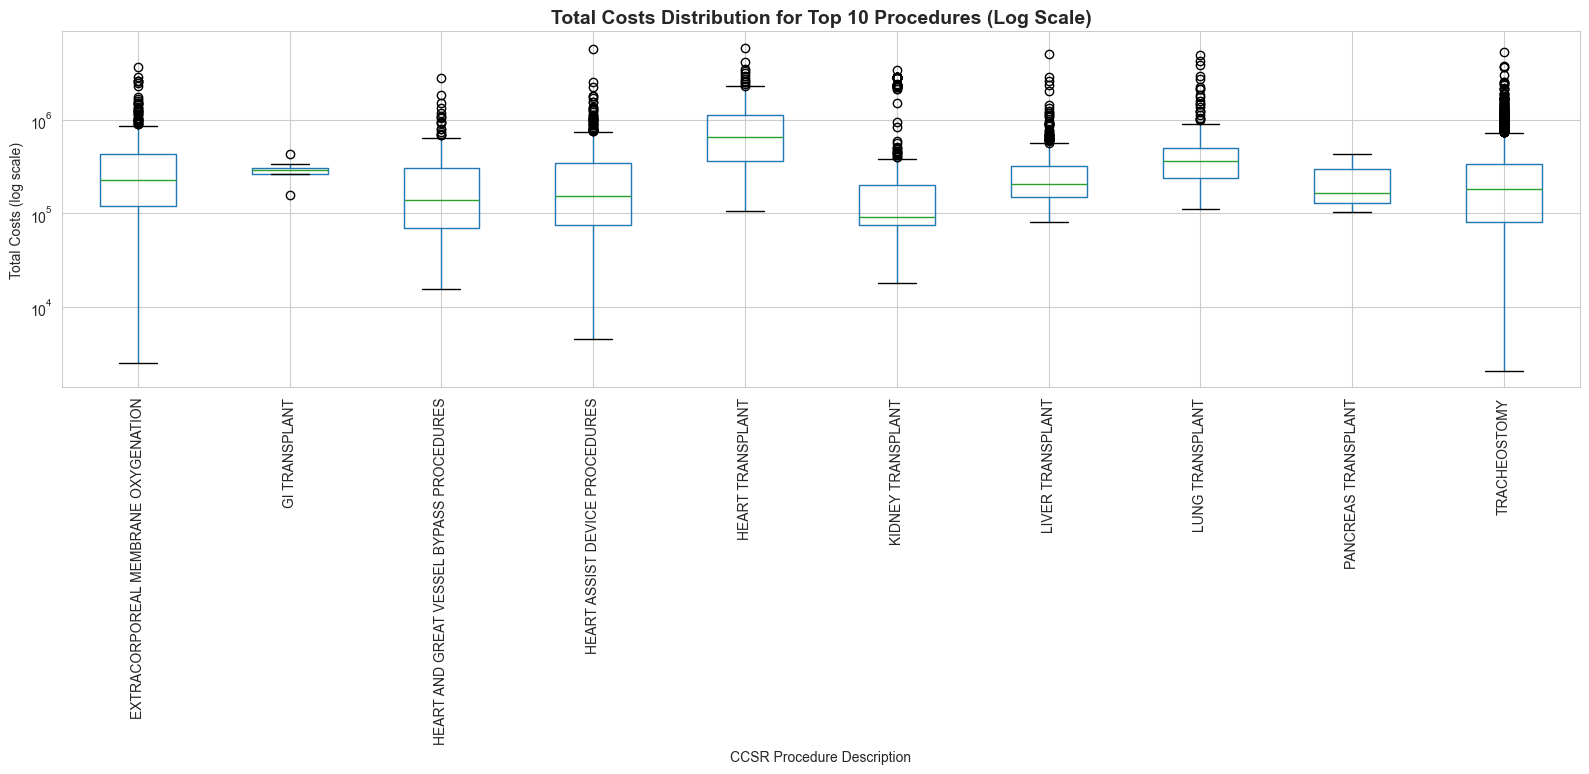

In [34]:
## 4.5 CCSR Procedure Description Effect on Total Costs
print("=" * 70)
print("EFFECT OF CCSR PROCEDURE DESCRIPTION ON TOTAL COSTS")
print("=" * 70)

if 'CCSR Procedure Description' in df.columns:
    # Filter out missing procedures
    df_procedures = df[df['CCSR Procedure Description'].notna()]
    
    if len(df_procedures) > 0:
        # Top 15 procedures by average cost
        procedure_costs = df_procedures.groupby('CCSR Procedure Description')['Total Costs'].agg(['mean', 'count']).sort_values('mean', ascending=False)
        top_15_procedures = procedure_costs.head(15)
        
        plt.figure(figsize=(14, 8))
        top_15_procedures['mean'].plot(kind='barh', color='orange')
        plt.title('Top 15 Procedures by Average Total Costs', fontsize=14, fontweight='bold')
        plt.xlabel('Average Total Costs ($)')
        plt.ylabel('CCSR Procedure Description')
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.show()
        
        print("\nTop 15 Procedures by Average Total Costs:")
        print(top_15_procedures)
        
        # Box plot for top 10
        top_10_procedures = top_15_procedures.head(10).index
        df_top_procedures = df_procedures[df_procedures['CCSR Procedure Description'].isin(top_10_procedures)]
        plt.figure(figsize=(16, 8))
        df_top_procedures.boxplot(column='Total Costs', by='CCSR Procedure Description', 
                                  figsize=(16, 8), rot=90)
        plt.yscale('log')
        plt.title('Total Costs Distribution for Top 10 Procedures (Log Scale)', 
                  fontsize=14, fontweight='bold')
        plt.suptitle('')
        plt.xlabel('CCSR Procedure Description')
        plt.ylabel('Total Costs (log scale)')
        plt.tight_layout()
        plt.show()
    else:
        print("No procedure data available")


EFFECT OF APR DRG DESCRIPTION ON TOTAL COSTS


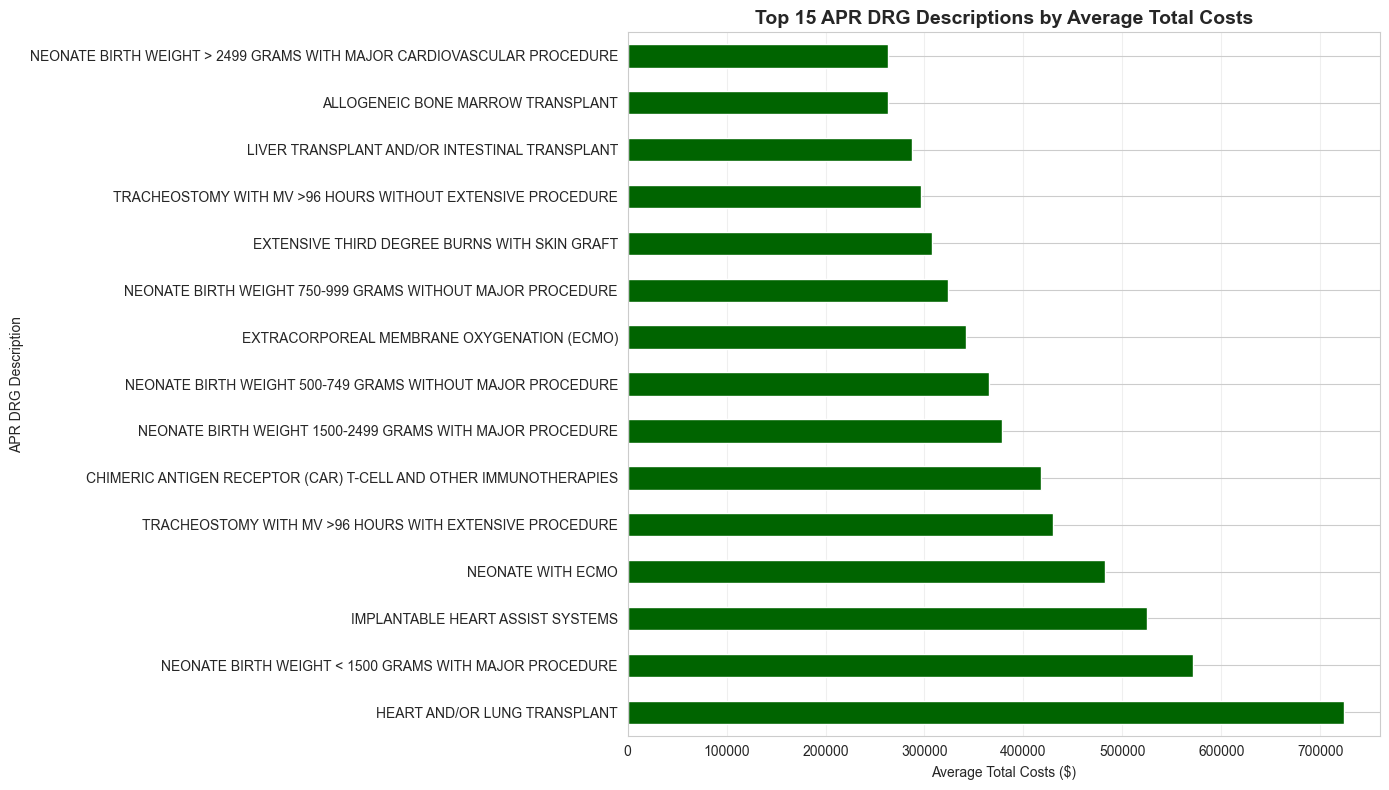


Top 15 APR DRG Descriptions by Average Total Costs:
                                                             mean  count
APR DRG Description                                                     
HEART AND/OR LUNG TRANSPLANT                        724275.372208    566
NEONATE BIRTH WEIGHT < 1500 GRAMS WITH MAJOR PR...  571159.356538    130
IMPLANTABLE HEART ASSIST SYSTEMS                    524528.020291    172
NEONATE WITH ECMO                                   482811.372653     49
TRACHEOSTOMY WITH MV >96 HOURS WITH EXTENSIVE P...  429847.835097   2380
CHIMERIC ANTIGEN RECEPTOR (CAR) T-CELL AND OTHE...  417618.306840    557
NEONATE BIRTH WEIGHT 1500-2499 GRAMS WITH MAJOR...  378049.097719    114
NEONATE BIRTH WEIGHT 500-749 GRAMS WITHOUT MAJO...  364990.990385    234
EXTRACORPOREAL MEMBRANE OXYGENATION (ECMO)          342154.954668    934
NEONATE BIRTH WEIGHT 750-999 GRAMS WITHOUT MAJO...  323697.668025    486
EXTENSIVE THIRD DEGREE BURNS WITH SKIN GRAFT        307899.977742     3

<Figure size 1600x800 with 0 Axes>

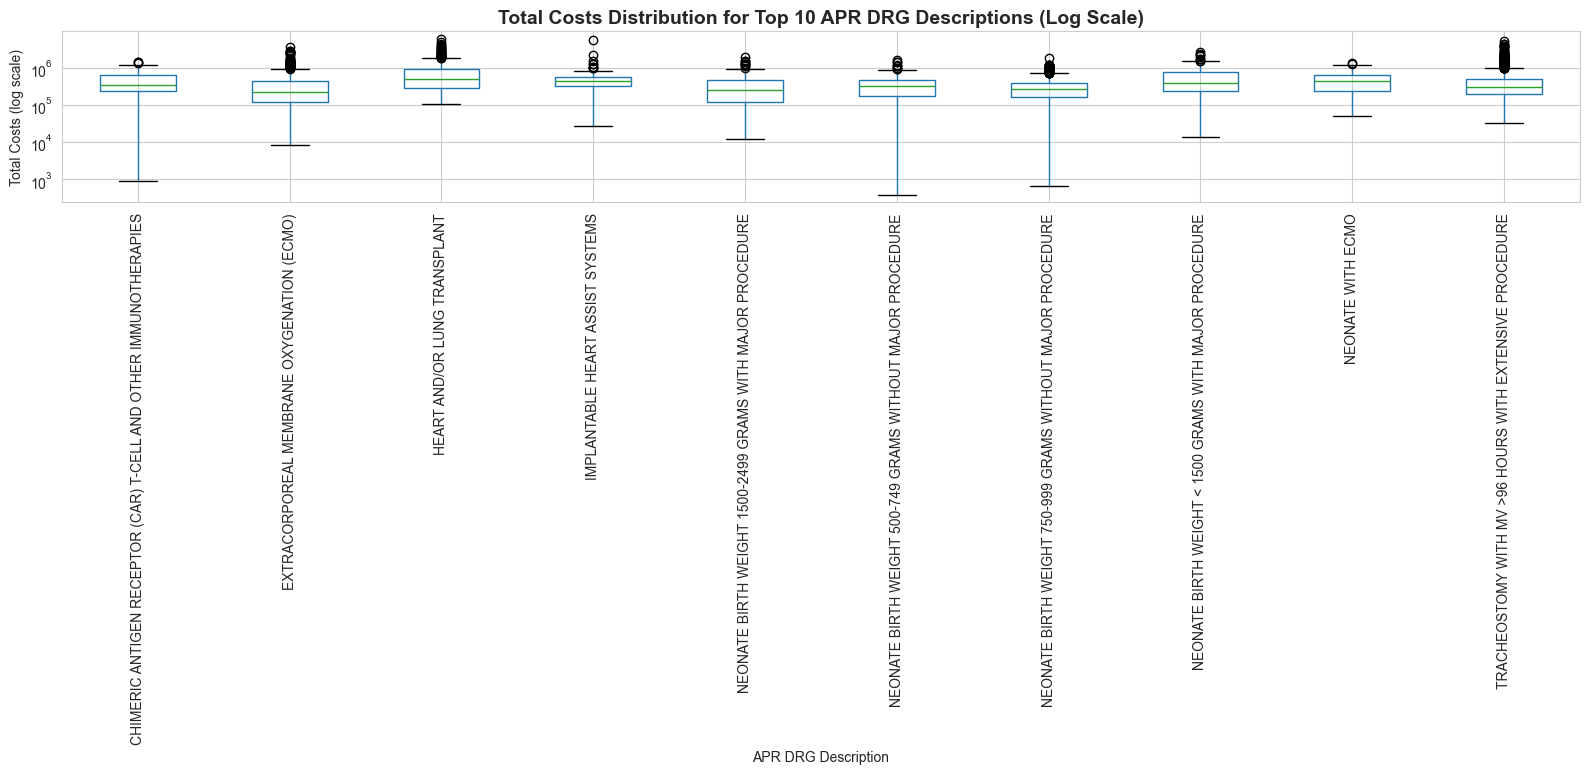

In [35]:
## 4.6 APR DRG Description Effect on Total Costs
print("=" * 70)
print("EFFECT OF APR DRG DESCRIPTION ON TOTAL COSTS")
print("=" * 70)

if 'APR DRG Description' in df.columns:
    # Top 15 DRGs by average cost
    drg_costs = df.groupby('APR DRG Description')['Total Costs'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    top_15_drg = drg_costs.head(15)
    
    plt.figure(figsize=(14, 8))
    top_15_drg['mean'].plot(kind='barh', color='darkgreen')
    plt.title('Top 15 APR DRG Descriptions by Average Total Costs', fontsize=14, fontweight='bold')
    plt.xlabel('Average Total Costs ($)')
    plt.ylabel('APR DRG Description')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 15 APR DRG Descriptions by Average Total Costs:")
    print(top_15_drg)
    
    # Box plot for top 10
    top_10_drg = top_15_drg.head(10).index
    df_top_drg = df[df['APR DRG Description'].isin(top_10_drg)]
    plt.figure(figsize=(16, 8))
    df_top_drg.boxplot(column='Total Costs', by='APR DRG Description', 
                       figsize=(16, 8), rot=90)
    plt.yscale('log')
    plt.title('Total Costs Distribution for Top 10 APR DRG Descriptions (Log Scale)', 
              fontsize=14, fontweight='bold')
    plt.suptitle('')
    plt.xlabel('APR DRG Description')
    plt.ylabel('Total Costs (log scale)')
    plt.tight_layout()
    plt.show()


EFFECT OF APR MDC DESCRIPTION ON TOTAL COSTS


<Figure size 1400x800 with 0 Axes>

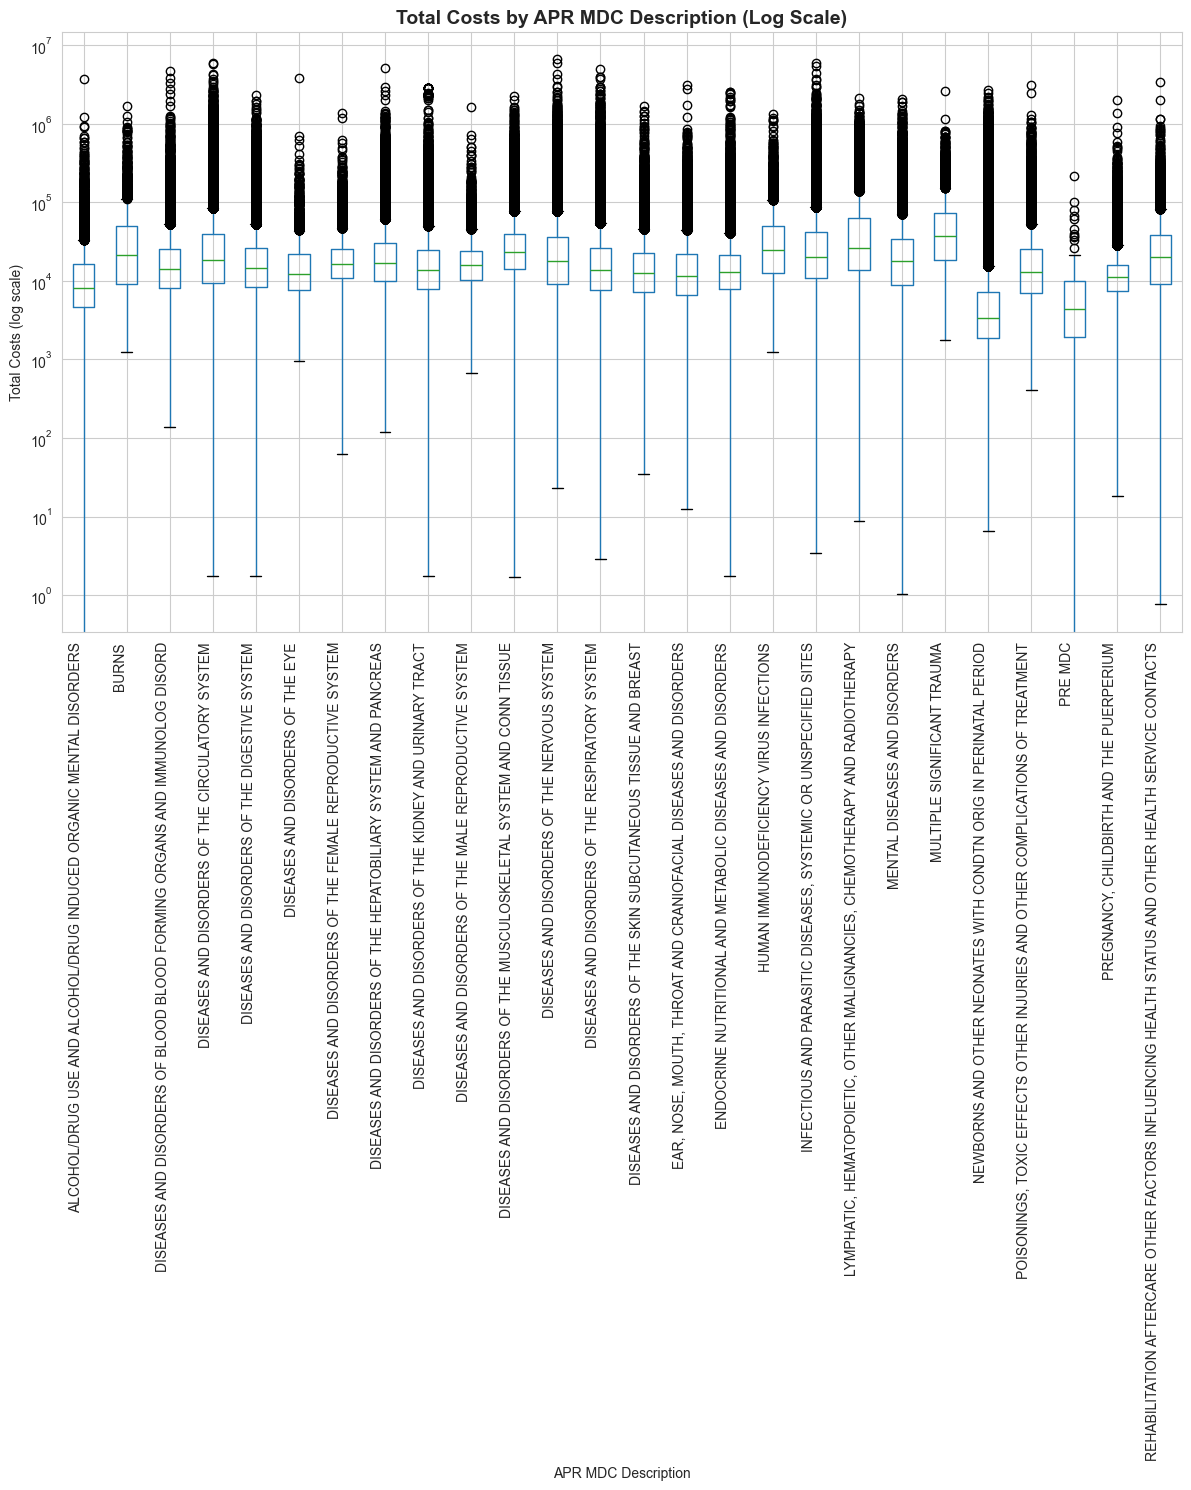


Total Costs Statistics by APR MDC Description:
                                                            mean     median  \
APR MDC Description                                                           
LYMPHATIC, HEMATOPOIETIC, OTHER MALIGNANCIES, C...  63232.795739  26481.715   
MULTIPLE SIGNIFICANT TRAUMA                         61375.450739  36828.610   
BURNS                                               53421.606424  21534.545   
HUMAN IMMUNODEFICIENCY VIRUS INFECTIONS             43624.452316  24553.350   
INFECTIOUS AND PARASITIC DISEASES, SYSTEMIC OR ...  39506.966852  20359.255   
DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM    34109.530097  18575.240   
DISEASES AND DISORDERS OF THE NERVOUS SYSTEM        33433.231414  17794.540   
DISEASES AND DISORDERS OF THE MUSCULOSKELETAL S...  33177.726842  23316.270   
REHABILITATION AFTERCARE OTHER FACTORS INFLUENC...  30956.480994  20400.500   
MENTAL DISEASES AND DISORDERS                       30161.445147  18095.950   
DISE

In [36]:
## 4.7 APR MDC Description Effect on Total Costs
print("=" * 70)
print("EFFECT OF APR MDC DESCRIPTION ON TOTAL COSTS")
print("=" * 70)

if 'APR MDC Description' in df.columns:
    plt.figure(figsize=(14, 8))
    df.boxplot(column='Total Costs', by='APR MDC Description', figsize=(14, 8))
    plt.yscale('log')
    plt.title('Total Costs by APR MDC Description (Log Scale)', fontsize=14, fontweight='bold')
    plt.suptitle('')
    plt.xlabel('APR MDC Description')
    plt.ylabel('Total Costs (log scale)')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()
    
    mdc_costs = df.groupby('APR MDC Description')['Total Costs'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
    print("\nTotal Costs Statistics by APR MDC Description:")
    print(mdc_costs)


EFFECT OF APR SEVERITY OF ILLNESS DESCRIPTION ON TOTAL COSTS


<Figure size 1200x600 with 0 Axes>

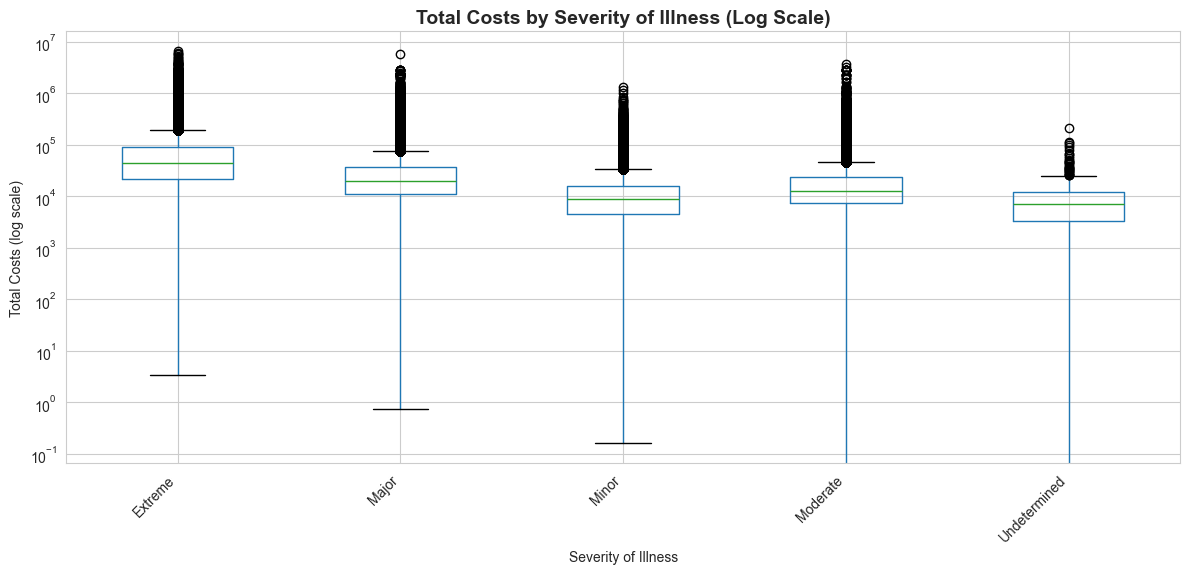


Total Costs Statistics by Severity of Illness:
                                             mean     median   count
APR Severity of Illness Description                                 
Extreme                              83895.038765  44485.120  183129
Major                                32056.669862  19851.195  573480
Moderate                             19681.134069  12964.880  820465
Minor                                13129.904356   9080.800  619207
Undetermined                         10972.995570   7199.945     456


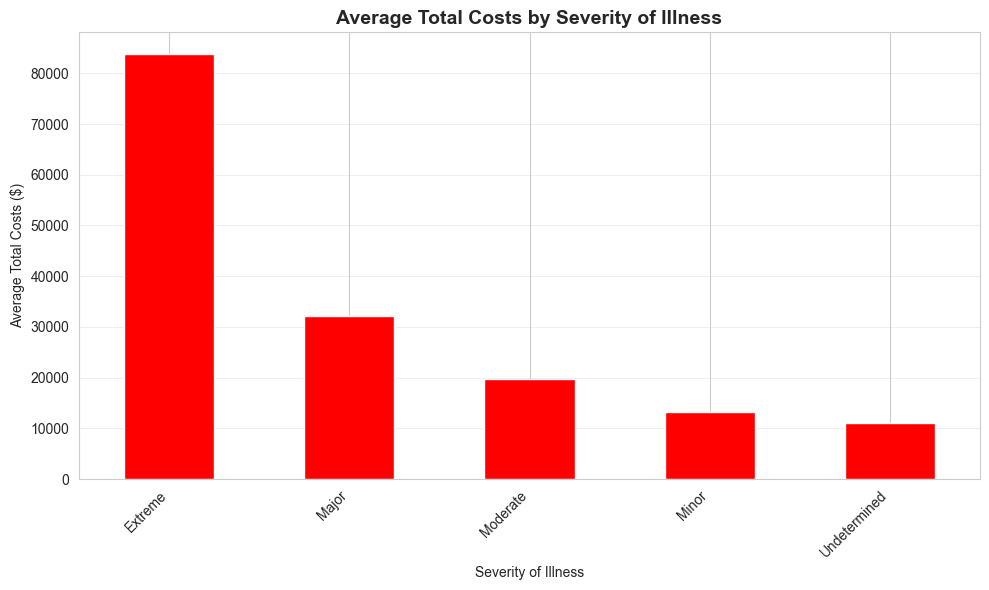

In [37]:
## 4.8 APR Severity of Illness Description Effect on Total Costs
print("=" * 70)
print("EFFECT OF APR SEVERITY OF ILLNESS DESCRIPTION ON TOTAL COSTS")
print("=" * 70)

if 'APR Severity of Illness Description' in df.columns:
    plt.figure(figsize=(12, 6))
    df.boxplot(column='Total Costs', by='APR Severity of Illness Description', figsize=(12, 6))
    plt.yscale('log')
    plt.title('Total Costs by Severity of Illness (Log Scale)', fontsize=14, fontweight='bold')
    plt.suptitle('')
    plt.xlabel('Severity of Illness')
    plt.ylabel('Total Costs (log scale)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    severity_costs = df.groupby('APR Severity of Illness Description')['Total Costs'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
    print("\nTotal Costs Statistics by Severity of Illness:")
    print(severity_costs)
    
    # Bar chart
    plt.figure(figsize=(10, 6))
    severity_costs['mean'].plot(kind='bar', color='red')
    plt.title('Average Total Costs by Severity of Illness', fontsize=14, fontweight='bold')
    plt.xlabel('Severity of Illness')
    plt.ylabel('Average Total Costs ($)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()


EFFECT OF APR RISK OF MORTALITY ON TOTAL COSTS


<Figure size 1200x600 with 0 Axes>

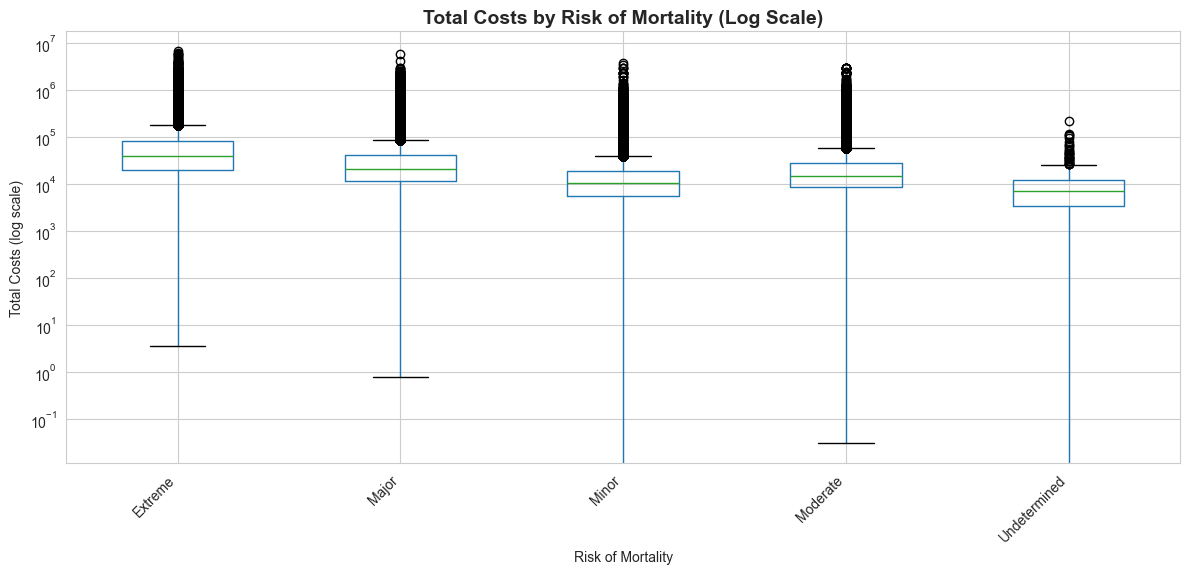


Total Costs Statistics by Risk of Mortality:
                               mean     median    count
APR Risk of Mortality                                  
Extreme                76980.428949  39463.600   170841
Major                  35396.335249  20782.810   440239
Moderate               24105.302759  15014.885   477108
Minor                  16054.781009  10630.550  1108093
Undetermined           10972.995570   7199.945      456


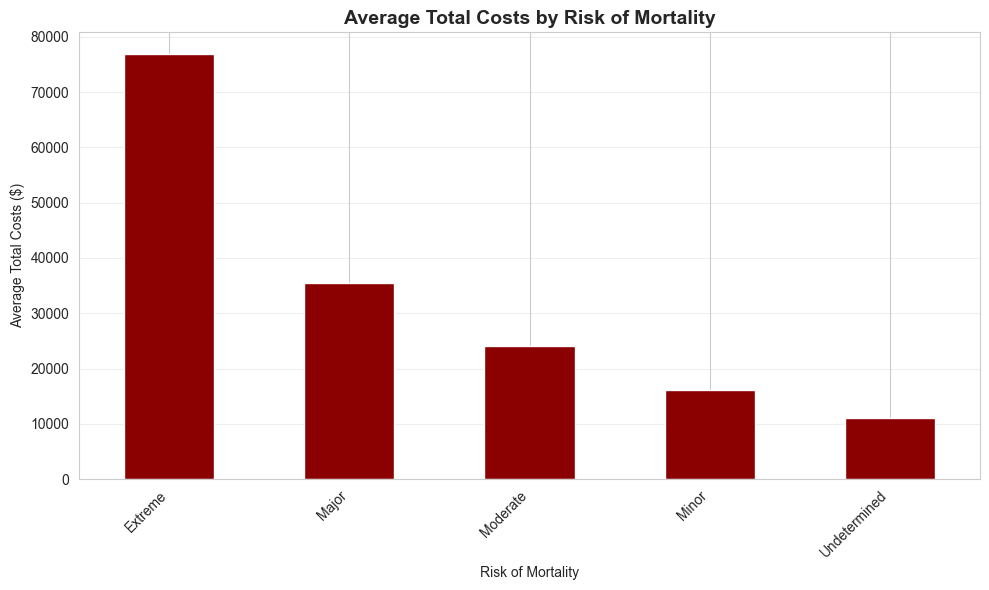

In [38]:
## 4.9 APR Risk of Mortality Effect on Total Costs
print("=" * 70)
print("EFFECT OF APR RISK OF MORTALITY ON TOTAL COSTS")
print("=" * 70)

if 'APR Risk of Mortality' in df.columns:
    plt.figure(figsize=(12, 6))
    df.boxplot(column='Total Costs', by='APR Risk of Mortality', figsize=(12, 6))
    plt.yscale('log')
    plt.title('Total Costs by Risk of Mortality (Log Scale)', fontsize=14, fontweight='bold')
    plt.suptitle('')
    plt.xlabel('Risk of Mortality')
    plt.ylabel('Total Costs (log scale)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    risk_costs = df.groupby('APR Risk of Mortality')['Total Costs'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
    print("\nTotal Costs Statistics by Risk of Mortality:")
    print(risk_costs)
    
    # Bar chart
    plt.figure(figsize=(10, 6))
    risk_costs['mean'].plot(kind='bar', color='darkred')
    plt.title('Average Total Costs by Risk of Mortality', fontsize=14, fontweight='bold')
    plt.xlabel('Risk of Mortality')
    plt.ylabel('Average Total Costs ($)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()


EFFECT OF APR MEDICAL SURGICAL DESCRIPTION ON TOTAL COSTS


<Figure size 1000x600 with 0 Axes>

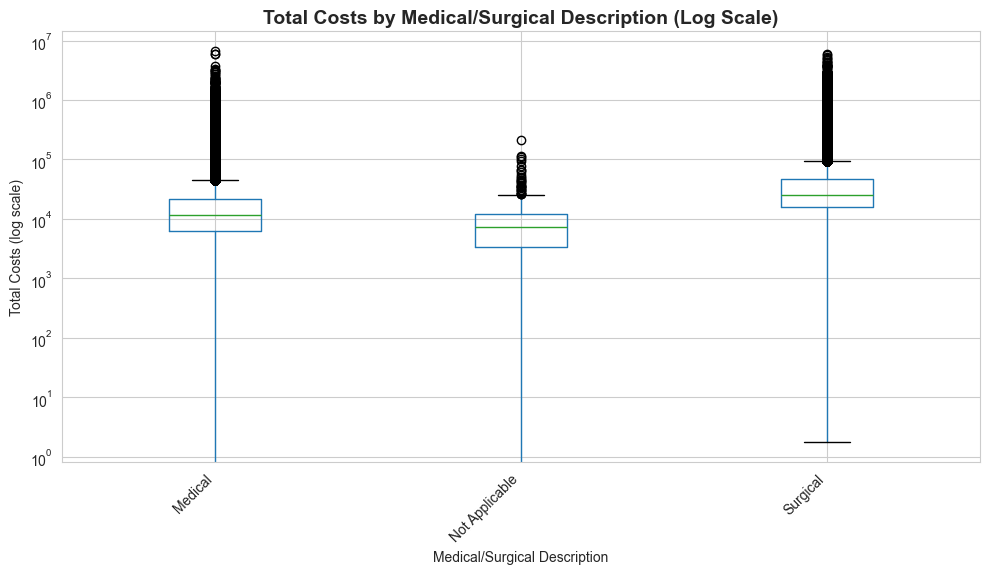


Total Costs Statistics by Medical/Surgical Description:
                                          mean     median    count
APR Medical Surgical Description                                  
Surgical                          45419.602622  25505.020   510037
Medical                           20672.931126  11527.005  1686244
Not Applicable                    10972.995570   7199.945      456


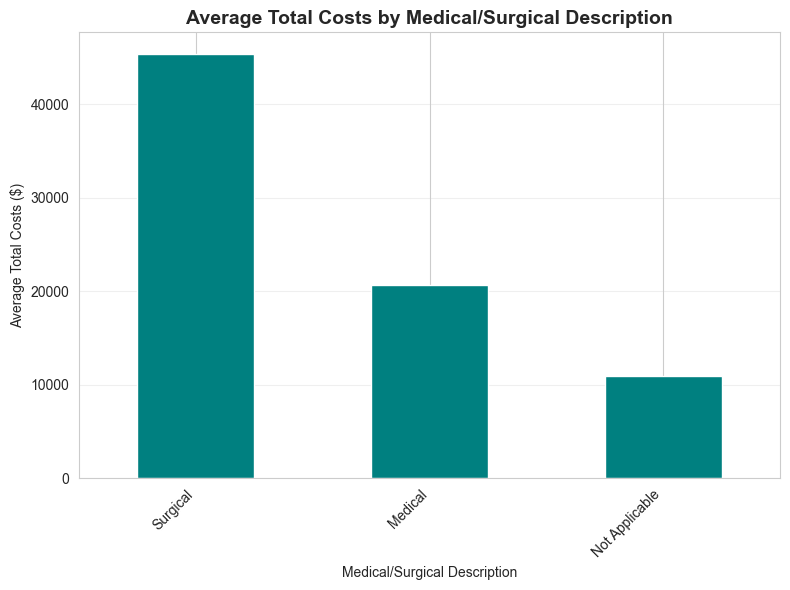

In [39]:
## 4.10 APR Medical Surgical Description Effect on Total Costs
print("=" * 70)
print("EFFECT OF APR MEDICAL SURGICAL DESCRIPTION ON TOTAL COSTS")
print("=" * 70)

if 'APR Medical Surgical Description' in df.columns:
    plt.figure(figsize=(10, 6))
    df.boxplot(column='Total Costs', by='APR Medical Surgical Description', figsize=(10, 6))
    plt.yscale('log')
    plt.title('Total Costs by Medical/Surgical Description (Log Scale)', fontsize=14, fontweight='bold')
    plt.suptitle('')
    plt.xlabel('Medical/Surgical Description')
    plt.ylabel('Total Costs (log scale)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    medsurg_costs = df.groupby('APR Medical Surgical Description')['Total Costs'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
    print("\nTotal Costs Statistics by Medical/Surgical Description:")
    print(medsurg_costs)
    
    # Bar chart
    plt.figure(figsize=(8, 6))
    medsurg_costs['mean'].plot(kind='bar', color='teal')
    plt.title('Average Total Costs by Medical/Surgical Description', fontsize=14, fontweight='bold')
    plt.xlabel('Medical/Surgical Description')
    plt.ylabel('Average Total Costs ($)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()


EFFECT OF EMERGENCY DEPARTMENT INDICATOR ON TOTAL COSTS


<Figure size 1000x600 with 0 Axes>

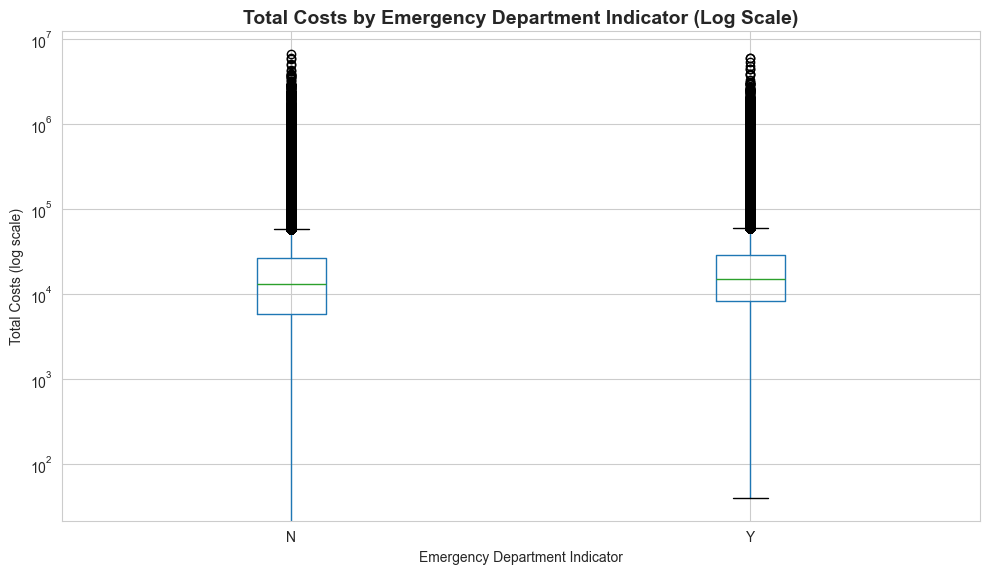


Total Costs Statistics by Emergency Department Indicator:
                                        mean    median    count
Emergency Department Indicator                                 
N                               25703.673175  12981.47   819596
Y                               26840.868076  14780.14  1377141


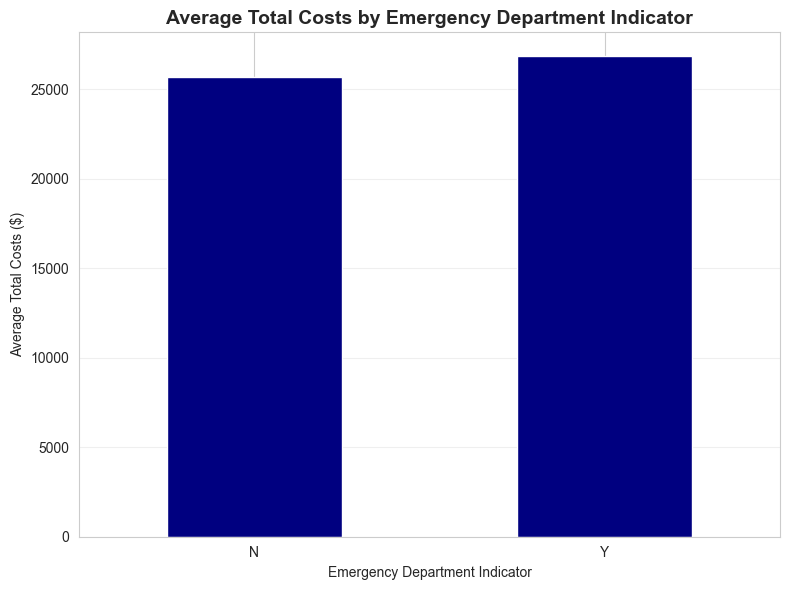

In [40]:
## 4.11 Emergency Department Indicator Effect on Total Costs
print("=" * 70)
print("EFFECT OF EMERGENCY DEPARTMENT INDICATOR ON TOTAL COSTS")
print("=" * 70)

if 'Emergency Department Indicator' in df.columns:
    plt.figure(figsize=(10, 6))
    df.boxplot(column='Total Costs', by='Emergency Department Indicator', figsize=(10, 6))
    plt.yscale('log')
    plt.title('Total Costs by Emergency Department Indicator (Log Scale)', fontsize=14, fontweight='bold')
    plt.suptitle('')
    plt.xlabel('Emergency Department Indicator')
    plt.ylabel('Total Costs (log scale)')
    plt.tight_layout()
    plt.show()
    
    ed_costs = df.groupby('Emergency Department Indicator')['Total Costs'].agg(['mean', 'median', 'count'])
    print("\nTotal Costs Statistics by Emergency Department Indicator:")
    print(ed_costs)
    
    # Bar chart
    plt.figure(figsize=(8, 6))
    ed_costs['mean'].plot(kind='bar', color='navy')
    plt.title('Average Total Costs by Emergency Department Indicator', fontsize=14, fontweight='bold')
    plt.xlabel('Emergency Department Indicator')
    plt.ylabel('Average Total Costs ($)')
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()


EFFECT OF PAYMENT_TYPOLOGY ON TOTAL COSTS


<Figure size 1400x600 with 0 Axes>

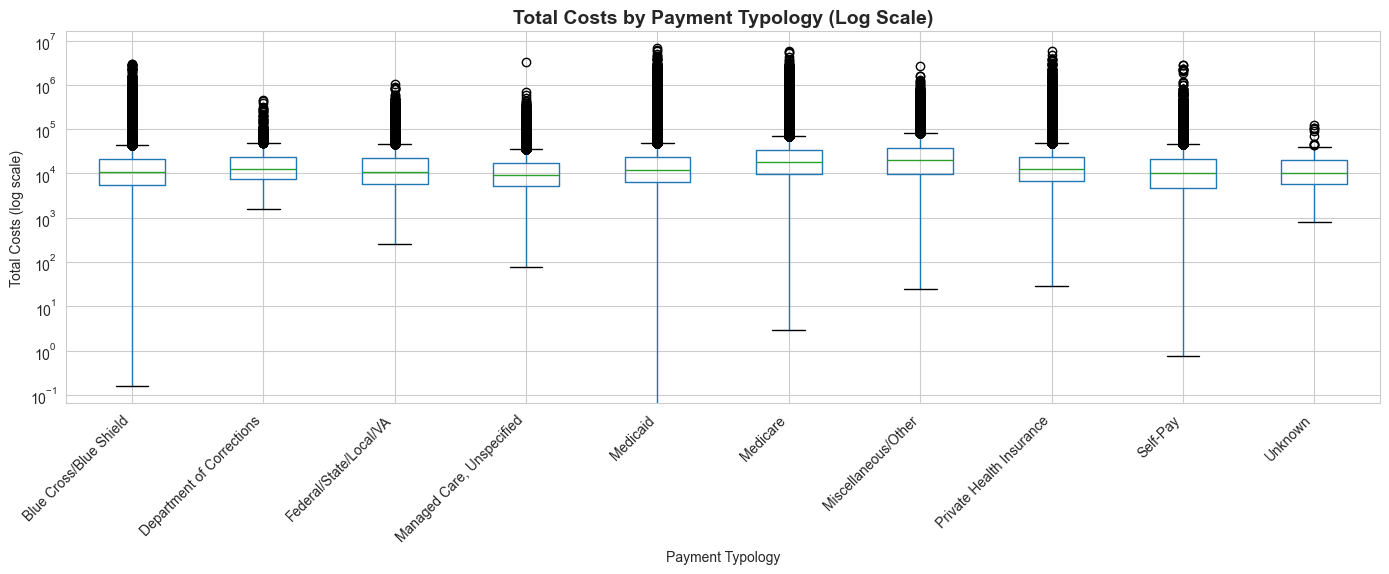


Total Costs Statistics by Payment Typology:
                                   mean     median   count
Payment_Typology                                          
Miscellaneous/Other        34775.864558  19798.190   21764
Medicare                   30310.846712  17695.310  929275
Medicaid                   24576.282531  12117.380  635671
Private Health Insurance   23646.879661  12664.370  317828
Department of Corrections  22517.619810  12873.540    1635
Blue Cross/Blue Shield     21141.418777  11040.465  204168
Self-Pay                   20334.646963   9992.800   34786
Federal/State/Local/VA     20194.099554  10982.190   21143
Unknown                    16325.411156  10036.200     147
Managed Care, Unspecified  15775.094276   9419.085   30320


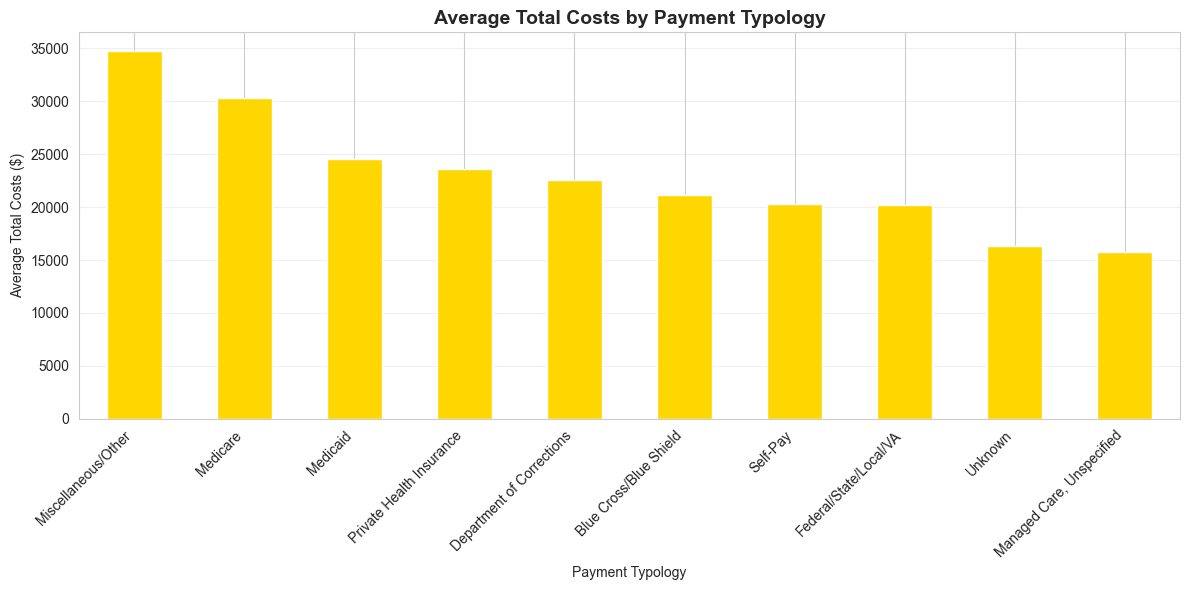

In [41]:
## 4.12 Payment_Typology Effect on Total Costs
print("=" * 70)
print("EFFECT OF PAYMENT_TYPOLOGY ON TOTAL COSTS")
print("=" * 70)

if 'Payment_Typology' in df.columns:
    plt.figure(figsize=(14, 6))
    df.boxplot(column='Total Costs', by='Payment_Typology', figsize=(14, 6))
    plt.yscale('log')
    plt.title('Total Costs by Payment Typology (Log Scale)', fontsize=14, fontweight='bold')
    plt.suptitle('')
    plt.xlabel('Payment Typology')
    plt.ylabel('Total Costs (log scale)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    payment_costs = df.groupby('Payment_Typology')['Total Costs'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
    print("\nTotal Costs Statistics by Payment Typology:")
    print(payment_costs)
    
    # Bar chart
    plt.figure(figsize=(12, 6))
    payment_costs['mean'].plot(kind='bar', color='gold')
    plt.title('Average Total Costs by Payment Typology', fontsize=14, fontweight='bold')
    plt.xlabel('Payment Typology')
    plt.ylabel('Average Total Costs ($)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()


In [43]:
## Summary: Key Insights
print("=" * 70)
print("EDA SUMMARY - KEY INSIGHTS")
print("=" * 70)

print("\n1. Target Variable (Total Costs):")
print(f"   - Mean: ${df['Total Costs'].mean():,.2f}")
print(f"   - Median: ${df['Total Costs'].median():,.2f}")
print(f"   - Std Dev: ${df['Total Costs'].std():,.2f}")
print(f"   - Log transform recommended for modeling (right-skewed distribution)")

if 'Length of Stay' in df.columns:
    los_corr = df[['Length of Stay', 'Total Costs']].corr().iloc[0, 1]
    print(f"\n2. Length of Stay Correlation: {los_corr:.4f}")
print("\nEDA Complete!")


EDA SUMMARY - KEY INSIGHTS

1. Target Variable (Total Costs):
   - Mean: $26,416.58
   - Median: $14,110.45
   - Std Dev: $55,372.29
   - Log transform recommended for modeling (right-skewed distribution)

2. Length of Stay Correlation: 0.6882

EDA Complete!
